# Temperature Forecast Project using ML

By Mónica Atiaga

Batch - DSNB1222

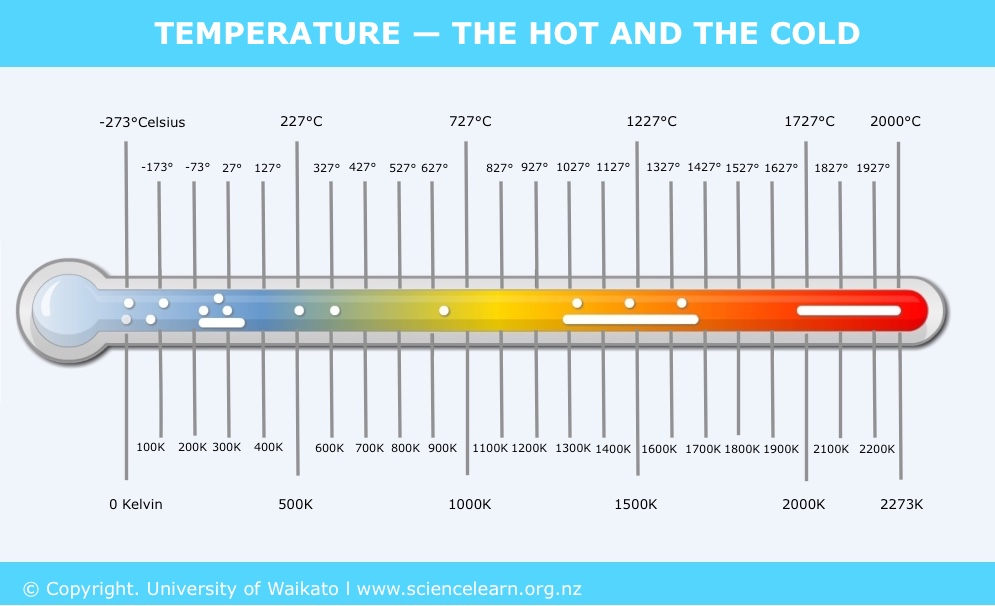

## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


### Dataset Link
* https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

* https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
df = pd.read_csv(url)

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (7752, 25)

The column headers in the dataset: Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


This dataset contains 7752 rows and 25 columns. Out of which the variables "Next_Tmax" and "Next_Tmin" are considered as targets for different approaches, the remaining 23 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the "Next_Tmax"(Regression problem) and the "Next_Tmin" (Regression Problem) we are going to analyze them as target variables during the EDA.

In [6]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are two types of data (object and float64 ) present in the dataset. Only Date column is object and the rest of columns are float64.

The dataset presents null values.

## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [7]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

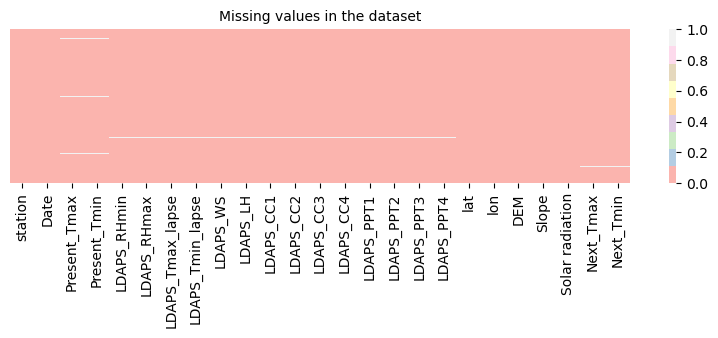

In [8]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Pastel1')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values but in a minimal proportion. 
The missing values will be treated in further sections.

## 1.3 Features Analysis
### 1.3.1 Unique values

Dropping these 15 rows that do not have any information represents 1.65% of the data.

In [9]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
station                             25  float64
Date                               310   object
Present_Tmax                       167  float64
Present_Tmin                       155  float64
LDAPS_RHmin                       7672  float64
LDAPS_RHmax                       7664  float64
LDAPS_Tmax_lapse                  7675  float64
LDAPS_Tmin_lapse                  7675  float64
LDAPS_WS                          7675  float64
LDAPS_LH                          7675  float64
LDAPS_CC1                         7569  float64
LDAPS_CC2                         7582  float64
LDAPS_CC3                         7599  float64
LDAPS_CC4                         7524  float64
LDAPS_PPT1                        2812  float64
LDAPS_PPT2                        2510  float64
LDAPS_PPT3                        2356  float64
LDAPS_PPT4                        1918  float64
lat                                 12  float64
lon                                 25  float64
DEM                                 25  float64
Slope                               27  float64
Solar radiation                   1575  float64
Next_Tmax                          183  float64
Next_Tmin                          157  float64

About the number of unique values:

- Next_Tmax and Next_Tmin are the target variables with 183 and 157 unique values respectively of 7752 total in the dataset. We are facing two regression problems since both target variables are continuous and numerical. 

- Only the Date datatype is Object, this feature will be converted in datetime later, and the rest of the features are numerical.

- However, the station(25), lat(12), lon(25), DEM(25), and Slope(27) columns, despite being numerical, seem to be categorical and should be analyzed as categorical as well during EDA.

#### 1.3.1.1 Next_Tmax unique values

In [10]:
# Inspect the unique values of the target variable
column = 'Next_Tmax'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature Next_Tmax:
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64
Unique values: [21.6, 21.8, 22.4, 22.5, 22.8, 23.0, 23.1, 23.2, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 34.8, nan, 17.4, 18.6, 18.9, 19.5, 19.7, 20.1, 20.3, 20.4, 20.5,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we need to build a regression model.

#### 1.3.1.2 Next_Tmin unique values

In [11]:
# Inspect the unique values of the target variable
column = 'Next_Tmin'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Next_Tmin:
23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64
Unique values: [17.8, 18.7, 18.9, 19.1, 19.3, 19.4, 19.5, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.8, 26.9, nan, 11.3, 12.9, 13.3, 13.4, 13.6, 13.8, 13.9, 14.1, 14.3, 14.4, 14.6, 14.7, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.8, 19.0, 19.2,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we will build a regression model since the variable is numerical and continuous.

#### 1.3.1.3 Date unique values

In [12]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


Date column has 310 unique values. Next, we will convert this column to datetime type.

In [13]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])
# df['month'] = df['Date'].dt.month

In [14]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Now the column Date is in datetype format, and we can use it in our analysis.

#### 1.3.1.4 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [15]:
categorical_col = ['station', 'lat', 'lon', 'DEM', 'Slope']
not_num_col = categorical_col + ['Date', 'Next_Tmax', 'Next_Tmin']
numerical_col = [col for col in df.columns if col not in not_num_col]

print(f"Numerical columns as categories: \n{categorical_col}\n")
print(f"Numerical columns: \n{numerical_col}")

Numerical columns as categories: 
['station', 'lat', 'lon', 'DEM', 'Slope']

Numerical columns: 
['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']


#### Categorical columns

In [16]:
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature station:
1.0     310
2.0     310
25.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
14.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
NaN       2
Name: station, dtype: int64
# unique values: 25

Feature lat:
37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64
# unique values: 12

Feature lon:
127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310

Although the above columns are numerical, they will be analyzed as categorical since they are discrete.

#### Numerical columns

In [17]:
for column in numerical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature Present_Tmax:
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
# unique values: 167

Feature Present_Tmin:
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
# unique values: 155

Feature LDAPS_RHmin:
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64
# unique values: 7672

Feature LDAPS_RHmax:
96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: LDAPS_RHmax, Length: 7664, dtype: int64
# unique values: 7664

Feature LDAPS_Tmax_lapse:
17.624954

The above features are numerical and continuous.

#### 1.3.1.5 Lat and lon unique values
Since these two features represent a specific position together it will be interesting to analyze them as a whole.
For that purpose, we will combine them in the feature 'position' to determine how many combinations are there in the dataset.

In [18]:
df['position'] = df['lat'].astype(str) + '-' + df['lon'].astype(str)
# df1.groupby(['lat','lon']).count().shape

column = 'position'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"# unique values: {df[column].nunique()}\n")

Feature position:
37.6046-126.991    310
37.6046-127.032    310
37.5237-126.97     310
37.5237-126.909    310
37.5372-126.891    310
37.5102-127.086    310
37.5507-127.04     310
37.6181-127.004    310
37.5776-126.938    310
37.4832-127.024    310
37.6181-127.099    310
37.4697-126.995    310
37.5507-126.937    310
37.4967-126.927    310
37.5776-127.083    310
37.5507-126.988    310
37.5372-127.085    310
37.4562-126.955    310
37.4967-126.826    310
37.4697-126.91     310
37.5776-126.838    310
37.5102-127.042    310
37.5507-127.135    310
37.645-127.022     310
37.5776-127.058    310
37.4562-126.826      1
37.645-127.135       1
Name: position, dtype: int64
# unique values: 27



As we see  there are 27 unique combinations of lat and lon which means these are specific positions where the samples were taken. It will be interesting to analyze this feature.

### 1.3.2 Imputing Missing values

In [19]:
missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. 

In all the columns with missing values, the percentage of missing is less than 1% then dropping these data is the best strategy for abording this issue.

However, it would be interesting to save the 27 rows where the target variables have null values in order to try our prediction models.

<!-- # Saving the rows with null values in target variables
df_eval = df[df['Next_Tmax'].isna()]

print(f"The dimension of the eval dataframe is {df_eval.shape}")
df_eval.sample(3) -->

In [20]:
cols_with_missing = missing_val[missing_val['Null values'] > 0].index.to_list()
cols_with_missing

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'Next_Tmax',
 'Next_Tmin']

In [21]:
# Dropping the missing values with % of missing less than 5%
df_new = df.dropna(subset=cols_with_missing)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

164 rows with missing values were deleted.
This represent 2.12% of the data.
In the new dataset there are 7588 rows and 26 columns.


####  Last check for missing values

In [22]:
df.isnull().sum().sum()

0

No more missing values to remove.

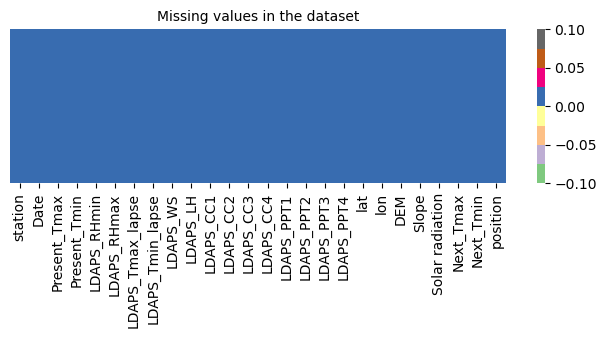

In [23]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [24]:
df.shape

(7588, 26)

Now, the studied dataframe has 7588 rows and 26 columns with no missing values. We lost about 2.12% of the data dropping some rows.

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [25]:
# Summary statistics of numerical columns
stats = df.describe()
stats

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [26]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Date        position
count                  7588            7588
unique                  307              25
top     2013-06-30 00:00:00  37.5237-126.97
freq                     25             307
first   2013-01-07 00:00:00             NaN
last    2017-12-08 00:00:00             NaN

**Observations**
- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no more missing values in the dataset

In [27]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

DEM                 16.202136
LDAPS_LH             5.594282
LDAPS_RHmin          1.701770
Slope                0.641755
LDAPS_PPT1           0.589008
LDAPS_WS             0.546259
LDAPS_PPT2           0.480738
LDAPS_PPT3           0.275007
LDAPS_PPT4           0.265373
LDAPS_CC4            0.070808
LDAPS_CC3            0.055751
LDAPS_CC1            0.052804
LDAPS_CC2            0.043852
station              0.014101
lon                 -0.003580
lat                 -0.005908
LDAPS_Tmax_lapse    -0.089409
Present_Tmax        -0.151634
Next_Tmax           -0.158474
Next_Tmin           -0.189180
Present_Tmin        -0.204191
LDAPS_Tmin_lapse    -0.246463
LDAPS_RHmax         -1.423299
Solar radiation    -98.263097
dtype: float64

In [28]:
stats['Solar radiation']

count    7588.000000
mean     5343.724208
std       429.782561
min      4329.520508
25%      5001.485717
50%      5441.987305
75%      5729.485840
max      5992.895996
Name: Solar radiation, dtype: float64

The mean value is larger than the median(50%) in all DEM, LDAPS_LH, LDAPS_RHmin columns. Therefore, the data is skewed to the right.
In fhe columns Solar radiation and LDAPS_RHmax the median(50%) is larger than the mean, then the data is skewed to the left.

In [29]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

LDAPS_LH             83.549084
DEM                  41.769806
LDAPS_PPT1           19.257383
LDAPS_PPT2           17.654268
LDAPS_PPT4           14.030775
LDAPS_PPT3           13.274055
LDAPS_RHmin          12.546648
LDAPS_WS             10.409457
LDAPS_Tmax_lapse      3.035135
Next_Tmax             2.434860
Next_Tmin             1.924669
Present_Tmax          1.916833
Present_Tmin          1.902431
LDAPS_Tmin_lapse      1.422399
Slope                 1.172949
LDAPS_CC4             0.169658
LDAPS_CC3             0.166577
LDAPS_CC2             0.096982
LDAPS_CC1             0.074248
lat                  -0.000649
lon                  -0.014859
station              -2.449816
LDAPS_RHmax          -2.759583
Solar radiation    -210.393335
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [30]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 26)

There are no duplicate values in the dataset.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Next_Tmax feature

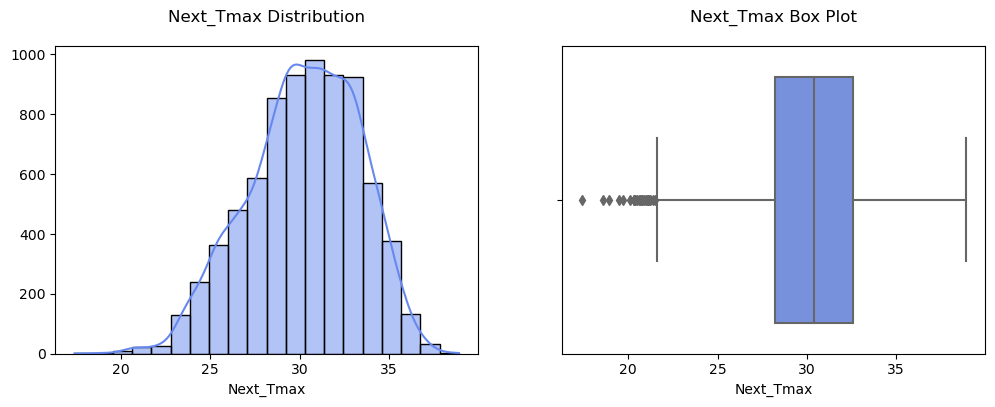

Skewness of Next_Tmax : -0.3348416351390219


In [31]:
#Visualize target distribution
col = 'Next_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Next_Tmax is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.2 Next_Tmin feature

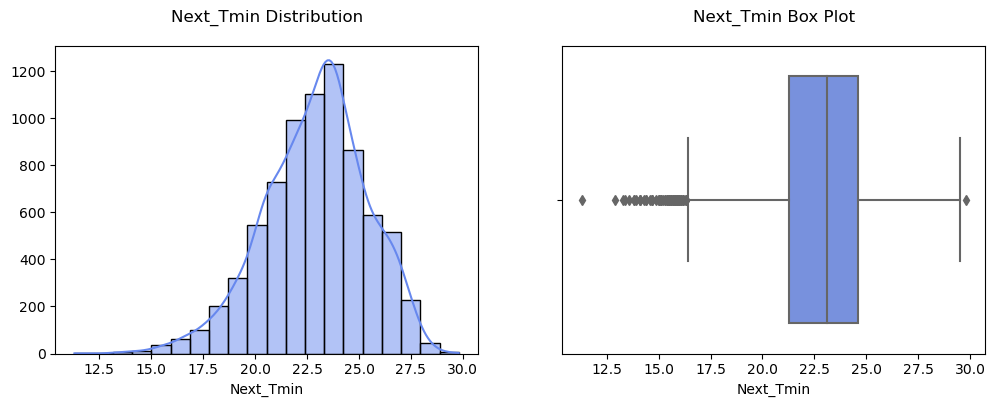

Skewness of Next_Tmin : -0.3936624459457225


In [32]:
#Visualize target distribution
col = 'Next_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Next_Tmin is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [33]:
# add possition column to categorical_col instead of lat and lon
categorical_col = categorical_col + ['position']
categorical_col.remove('lat')
categorical_col.remove('lon')


In [34]:
# List of numerical columns that look like categories
for i,col in enumerate(categorical_col):
    print(f"{i+1}. {col}")

1. station
2. DEM
3. Slope
4. position


####  station (1)

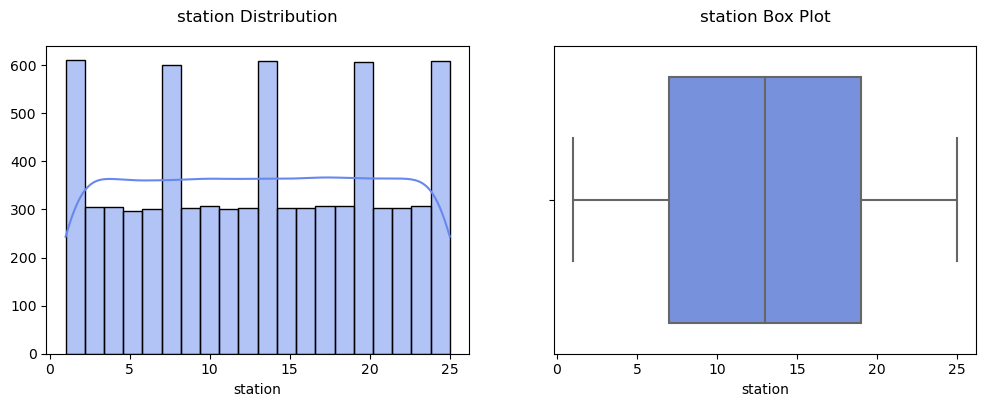

Skewness of station : -0.004177859024526559


In [35]:
#Visualize target distribution
col = 'station'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of station is uniform. There are no outliers present in the Box plot.

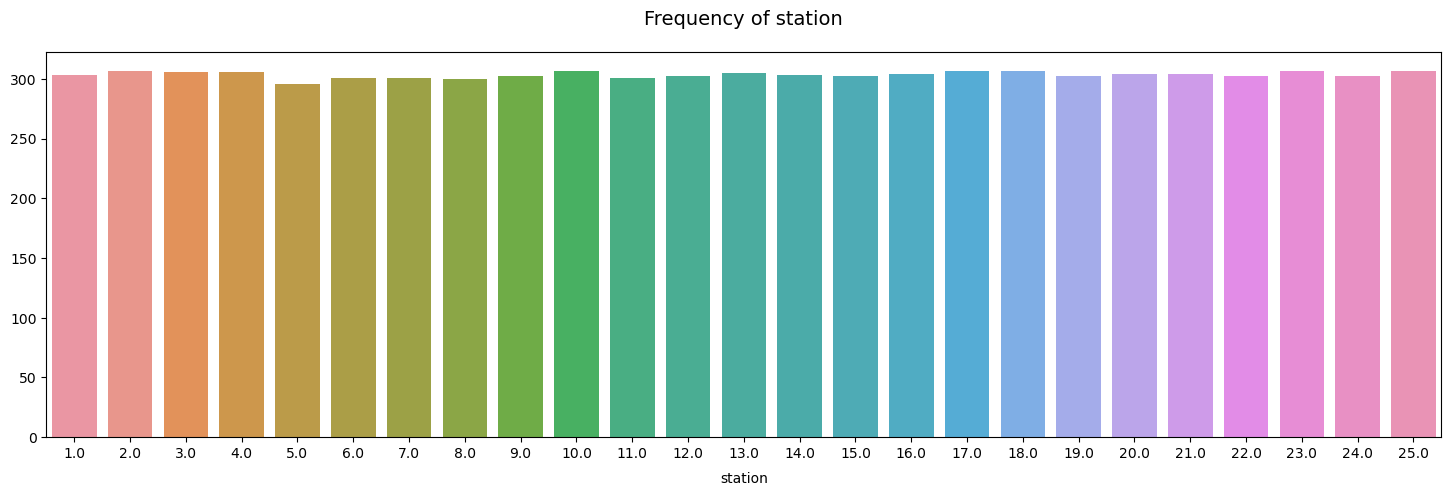

In [36]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of station (1)
column = 'station'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### DEM(2)

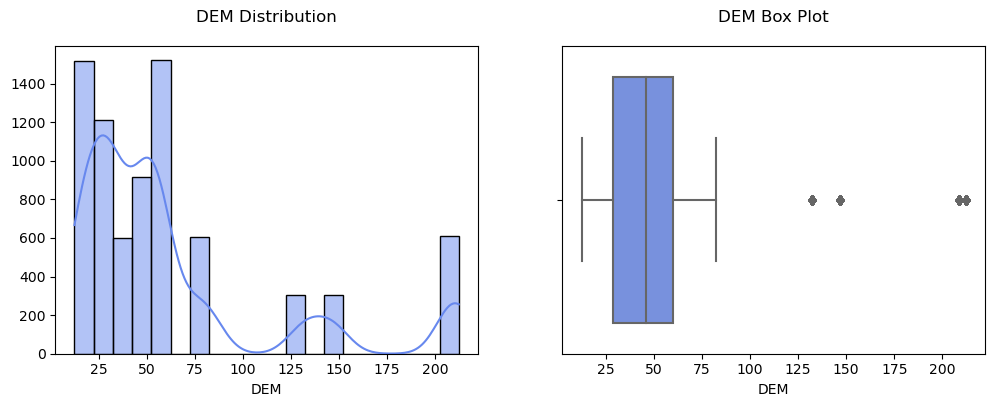

Skewness of DEM : 1.7216166816077285


In [37]:
#Visualize target distribution
col = 'DEM'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of DEM is skewed to the right although is discrete. There are some outliers present in the Box plot.

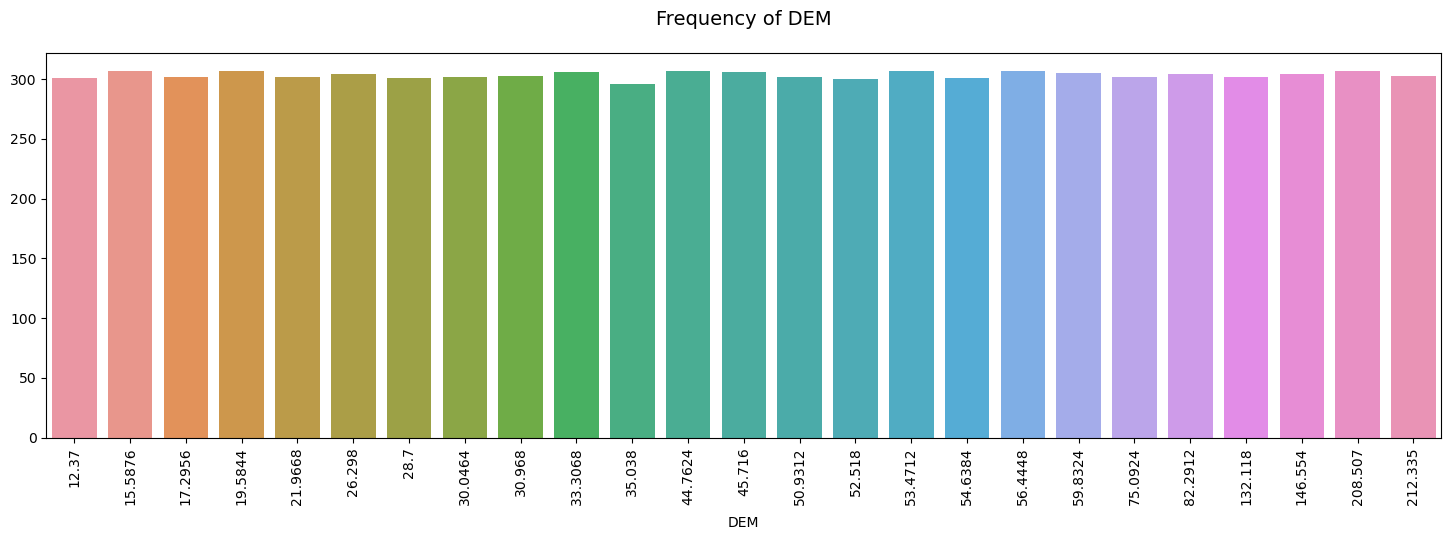

In [38]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of DEM (2)
column = 'DEM'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### Slope (3)

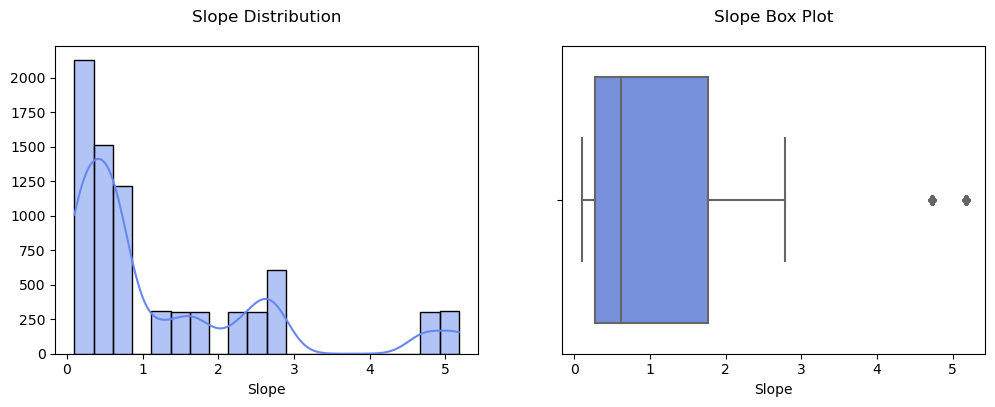

Skewness of Slope : 1.5590502641157087


In [39]:
#Visualize target distribution
col = 'Slope'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Slope is skewed to the right although is discrete. There are some outliers present in the Box plot.

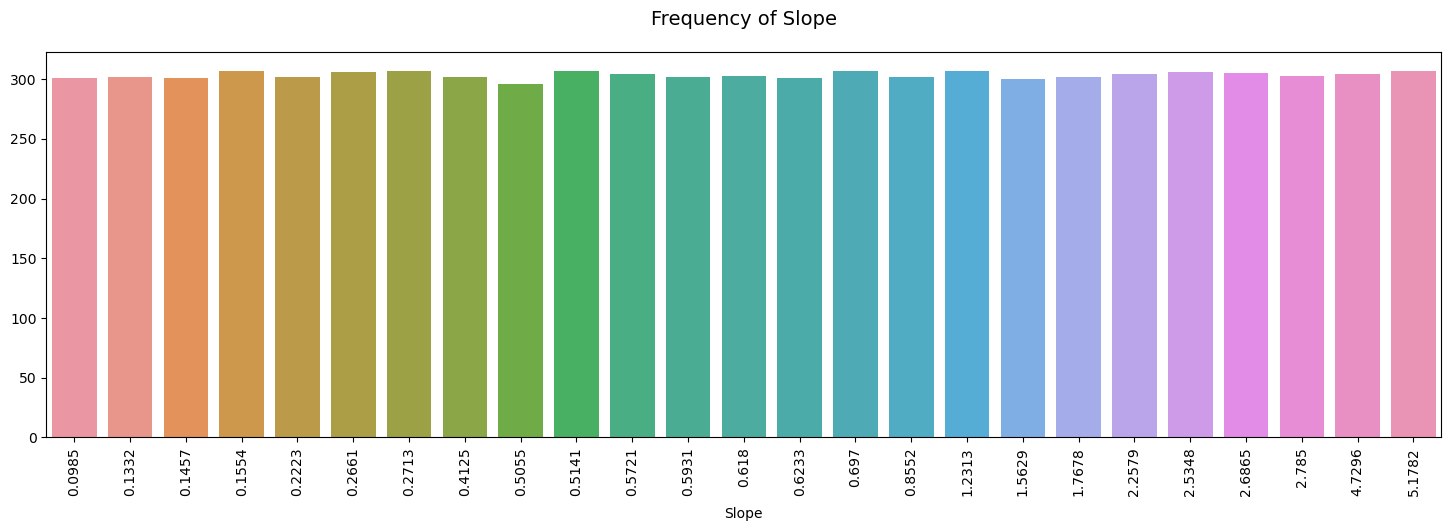

In [40]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Slope (3)
column = 'Slope'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### Position (4)

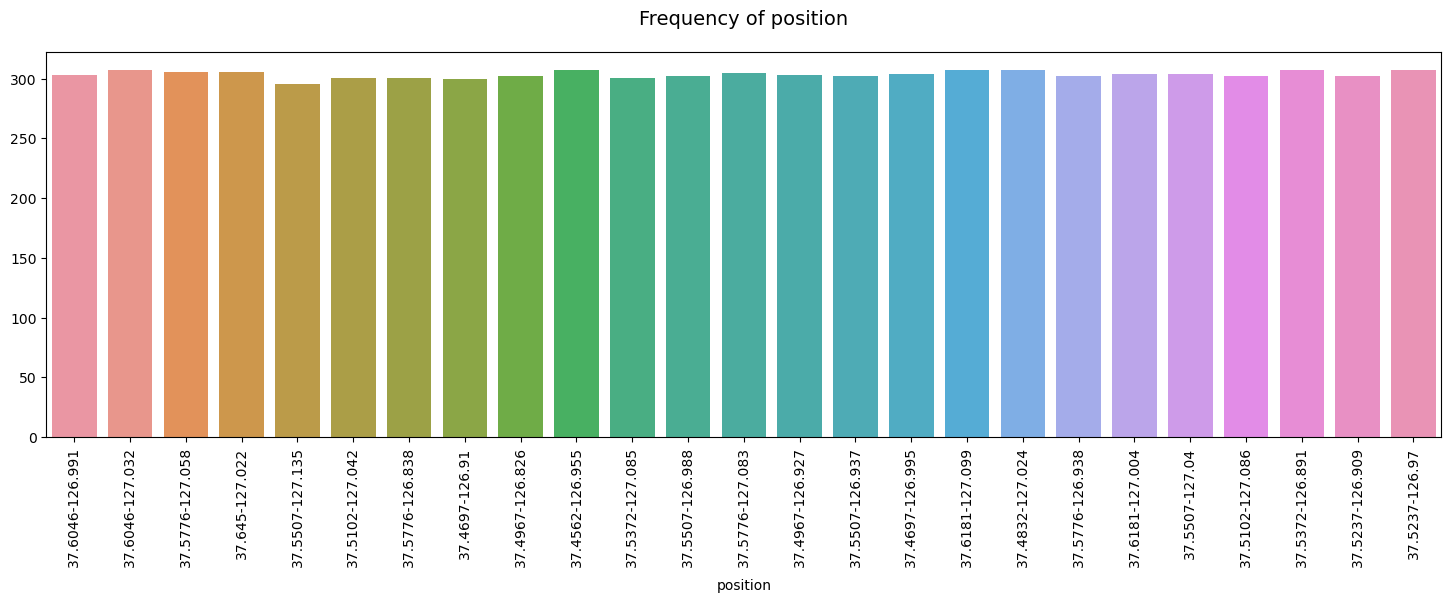

In [41]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of position (4)
column = 'position'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

In [42]:
df.position.nunique()

25

The number of observations of each position is almost the same. There are 25 unique position registered.

#### Numerical columns

In [43]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Present_Tmax
2. Present_Tmin
3. LDAPS_RHmin
4. LDAPS_RHmax
5. LDAPS_Tmax_lapse
6. LDAPS_Tmin_lapse
7. LDAPS_WS
8. LDAPS_LH
9. LDAPS_CC1
10. LDAPS_CC2
11. LDAPS_CC3
12. LDAPS_CC4
13. LDAPS_PPT1
14. LDAPS_PPT2
15. LDAPS_PPT3
16. LDAPS_PPT4
17. Solar radiation


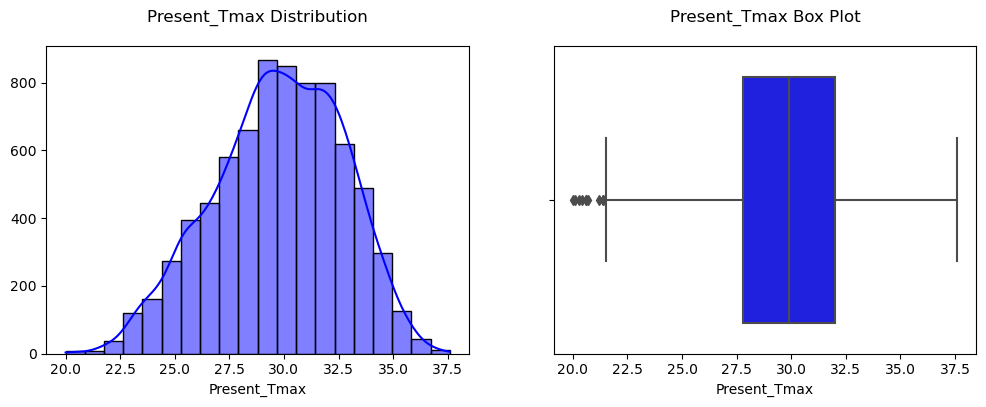

Skewness of Present_Tmax : -0.25706886624626474


In [44]:
#Visualize (1) Present_Tmax
col = 'Present_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Present_Tmax
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Present_Tmax' is slightly skewed to the left. There are outliers present in the Box plot.

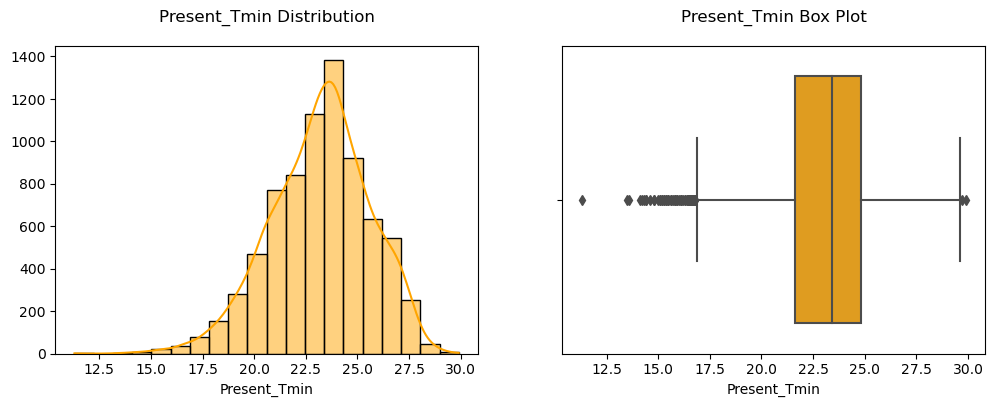

Skewness of Present_Tmin : -0.3538218967241725


In [45]:
#Visualize (2) Present_Tmin
col = 'Present_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Present_Tmin
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Present_Tmin' is slightly skewed to the left. There are outliers present in the Box plot.

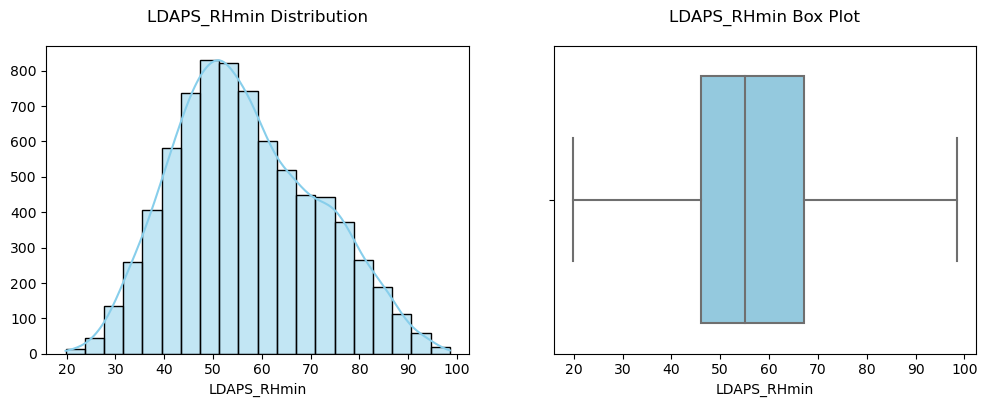

Skewness of LDAPS_RHmin : 0.30139555867014534


In [46]:
#Visualize (3) LDAPS_RHmin
col = 'LDAPS_RHmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_RHmin
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_RHmin' is skewed to the right. There are NO outliers present in the Box plot.

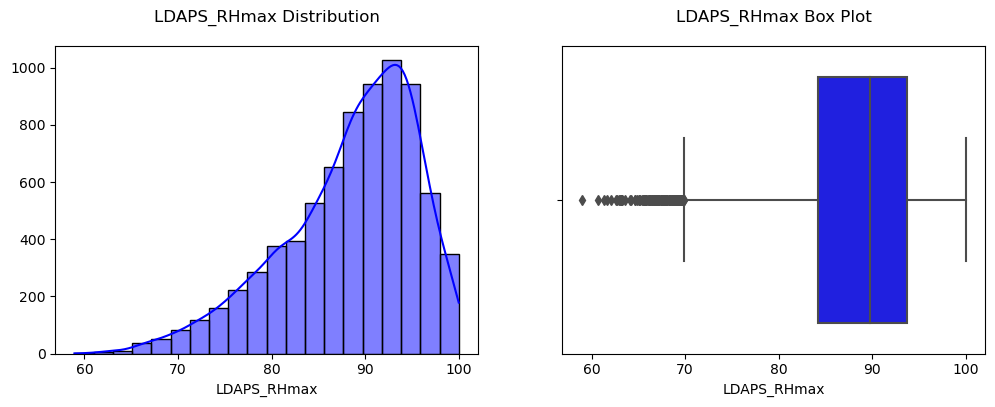

Skewness of LDAPS_RHmax : -0.8452636249574039


In [47]:
#Visualize (4) LDAPS_RHmax
col = 'LDAPS_RHmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_RHmax
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_RHmax' is skewed to the left. There are outliers present in the Box plot.

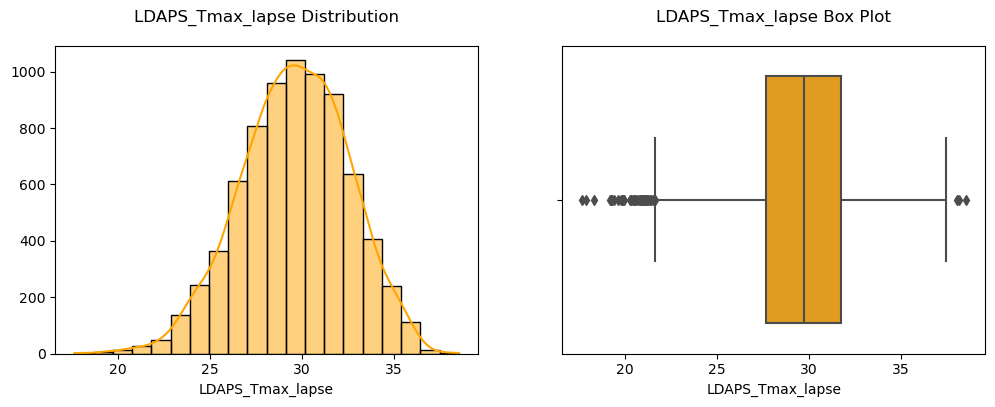

Skewness of LDAPS_Tmax_lapse : -0.22234900075307953


In [48]:
#Visualize (5) LDAPS_Tmax_lapse
col = 'LDAPS_Tmax_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total LDAPS_Tmax_lapse
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_Tmax_lapse' is slightly skewed to the left. There are outliers present in the Box plot.

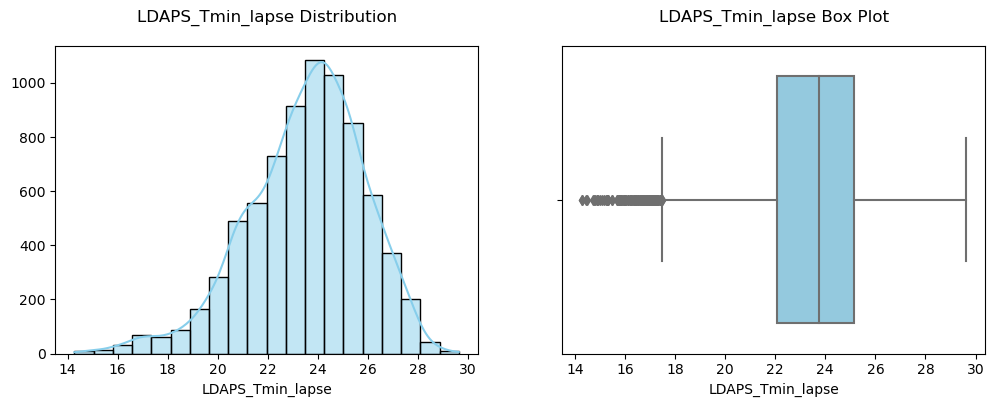

Skewness of LDAPS_Tmin_lapse : -0.5740346797849039


In [49]:
#Visualize (6) LDAPS_Tmin_lapse
col = 'LDAPS_Tmin_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_Tmin_lapse
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_Tmin_lapse' is skewed to the left. There are outliers present in the Box plot.

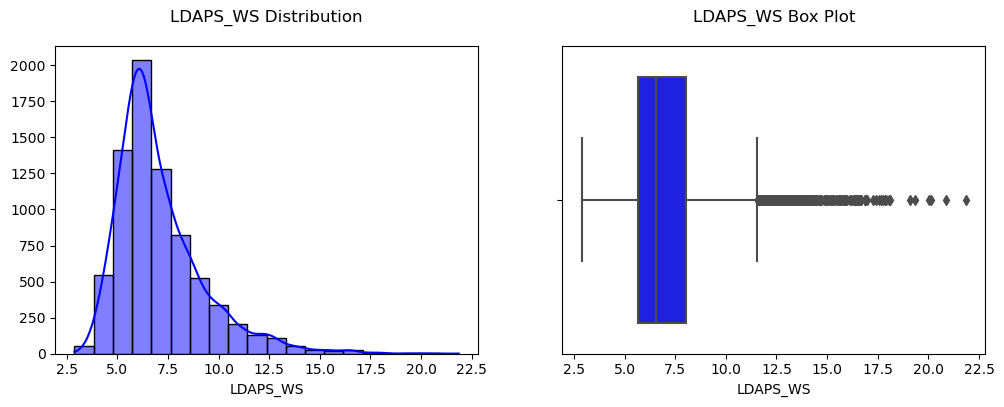

Skewness of LDAPS_WS : 1.5539261125674748


In [50]:
#Visualize (7) LDAPS_WS
col = 'LDAPS_WS'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_WS
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_WS' is skewed to the right. There are outliers present in the Box plot.

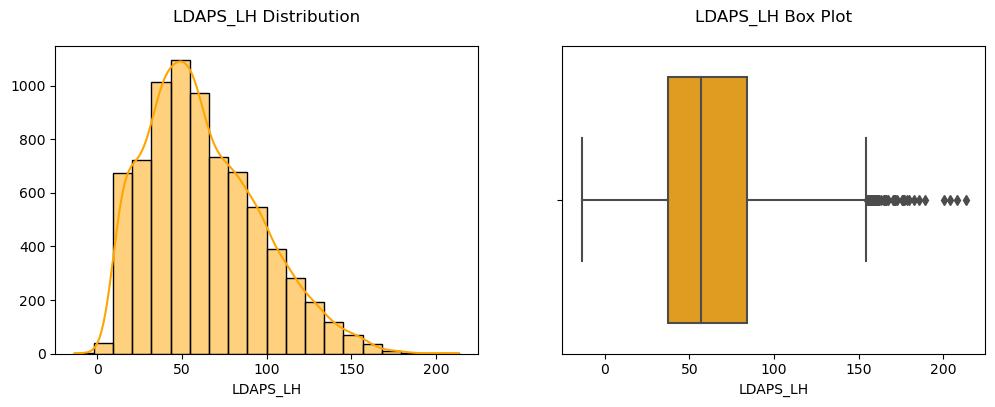

Skewness of LDAPS_LH : 0.6629705787700664


In [51]:
#Visualize (8) LDAPS_LH
col = 'LDAPS_LH'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_LH
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_LH' is skewed to the right. There are outliers present in the Box plot.

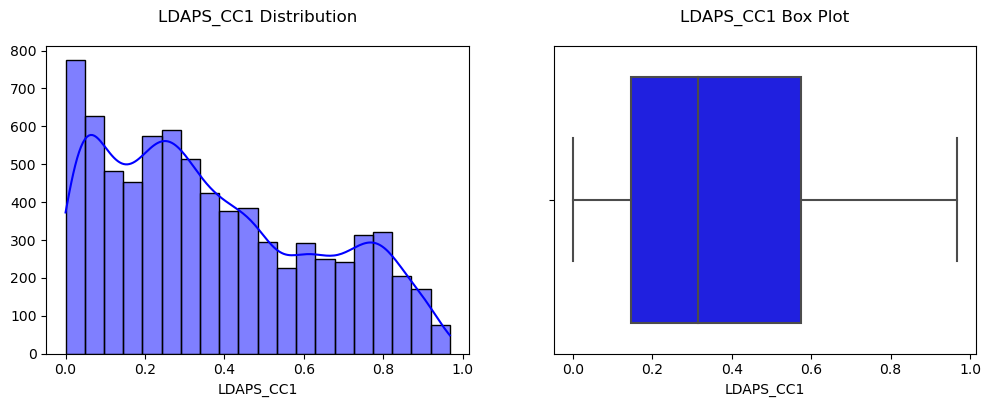

Skewness of LDAPS_CC1 : 0.4567158382781983


In [52]:
#Visualize (9) LDAPS_CC1
col = 'LDAPS_CC1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC1
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC1' is skewed to the right. There are NO outliers present in the Box plot.

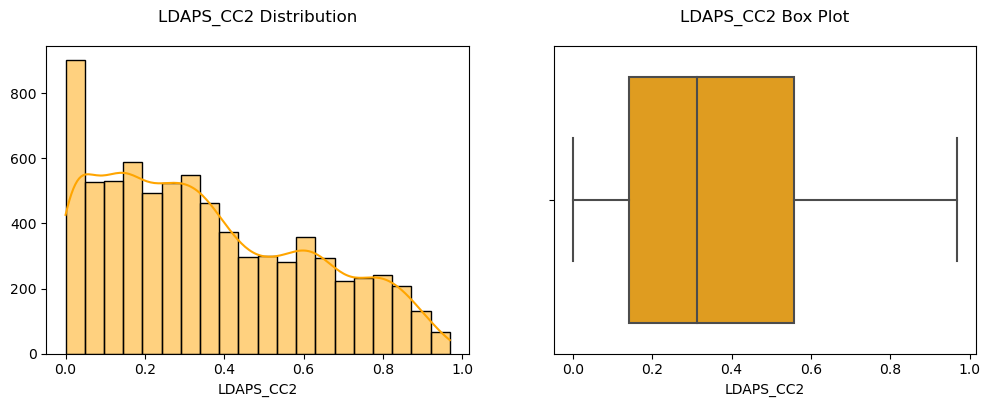

Skewness of LDAPS_CC2 : 0.4739293093576641


In [53]:
#Visualize (10) LDAPS_CC2
col = 'LDAPS_CC2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC2
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC2' is skewed to the right. There are NO outliers present in the Box plot.

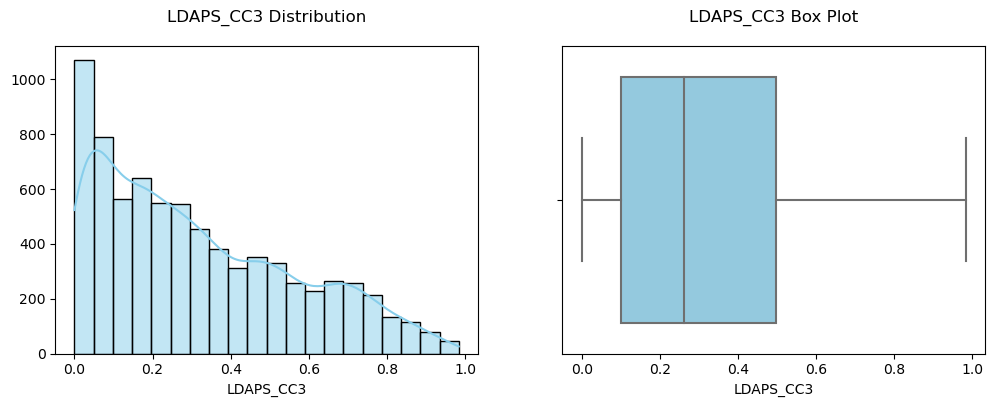

Skewness of LDAPS_CC3 : 0.6396492372098013


In [54]:
#Visualize (11) LDAPS_CC3
col = 'LDAPS_CC3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC3
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC3' is skewed to the right. There are NO outliers present in the Box plot.

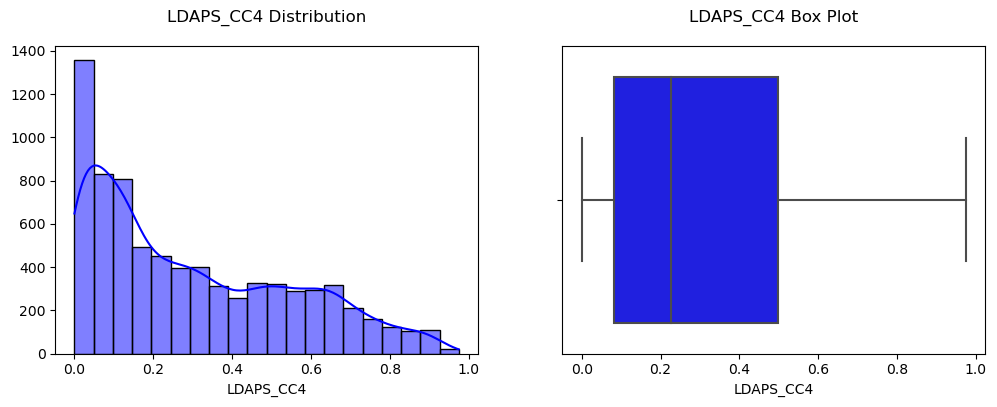

Skewness of LDAPS_CC4 : 0.6638153419746528


In [55]:
#Visualize (12) LDAPS_CC4
col = 'LDAPS_CC4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC4
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC4' is skewed to the right. There are NO outliers present in the Box plot.

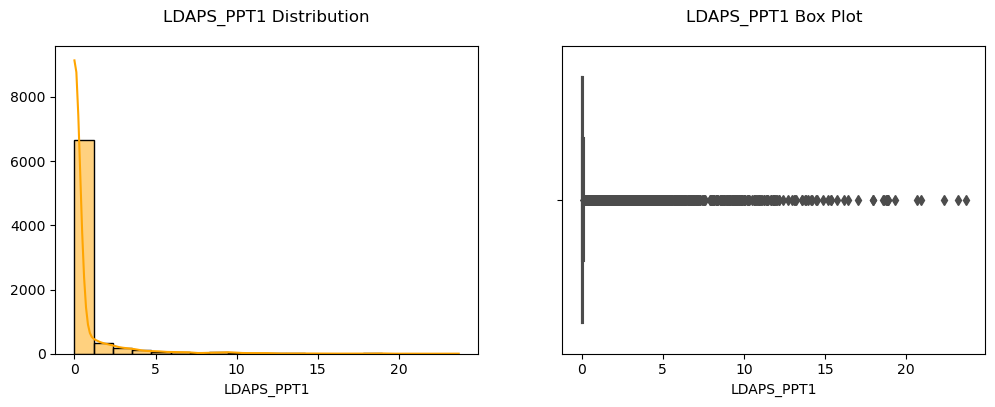

Skewness of LDAPS_PPT1 : 5.3059059957975325


In [56]:
#Visualize (13) LDAPS_PPT1
col = 'LDAPS_PPT1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total LDAPS_PPT1
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT1' is skewed to the right. There are outliers present in the Box plot.

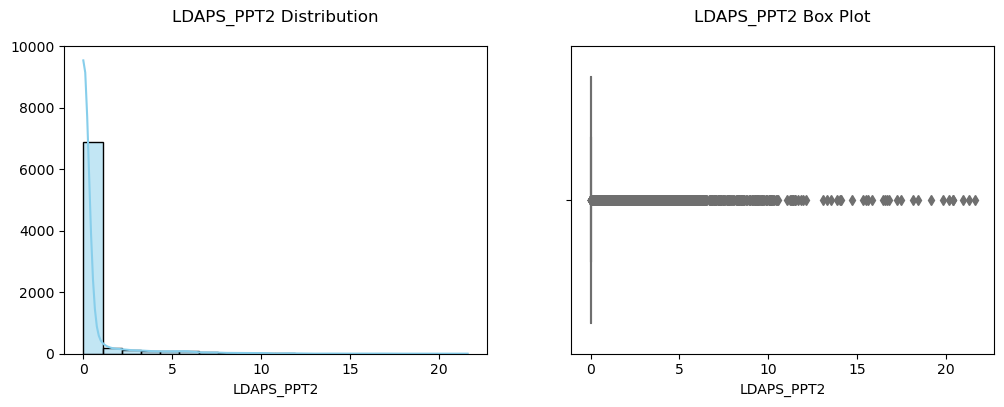

Skewness of LDAPS_PPT2 : 5.710360098053624


In [57]:
#Visualize (14) LDAPS_PPT2
col = 'LDAPS_PPT2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT2
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT2' is skewed to the right. There are outliers present in the Box plot.

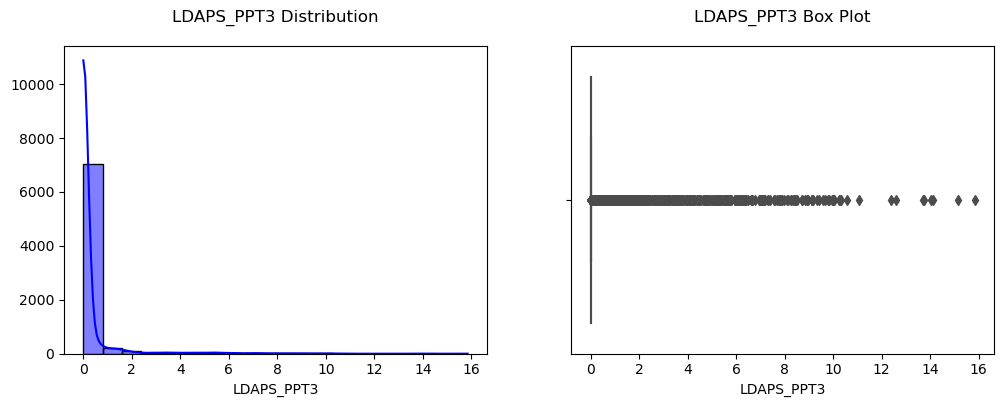

Skewness of LDAPS_PPT3 : 6.356670451431369


In [58]:
#Visualize (15) LDAPS_PPT3
col = 'LDAPS_PPT3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT3
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT3' is skewed to the right. There are outliers present in the Box plot.

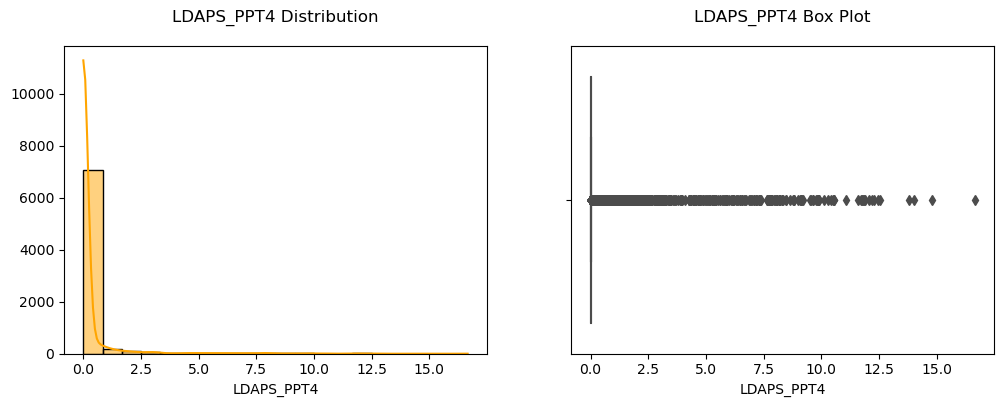

Skewness of LDAPS_PPT4 : 6.6812557353191435


In [59]:
#Visualize (16) LDAPS_PPT4
col = 'LDAPS_PPT4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT4
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT4' is skewed to the right. There are outliers present in the Box plot.

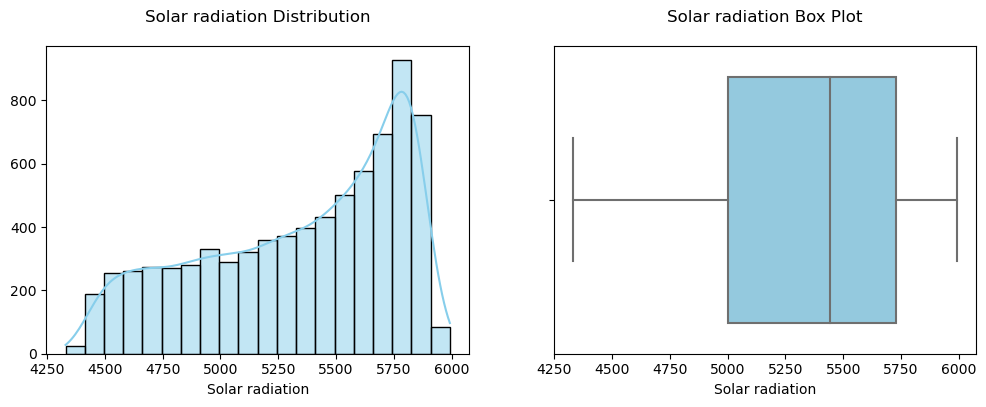

Skewness of Solar radiation : -0.5243245791911233


In [60]:
#Visualize (17) Solar radiation
col = 'Solar radiation'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Solar radiation
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Solar radiation' is skewed to the left. There are NO outliers present in the Box plot.

#### 1.4.1.4 Univariate Boxplot

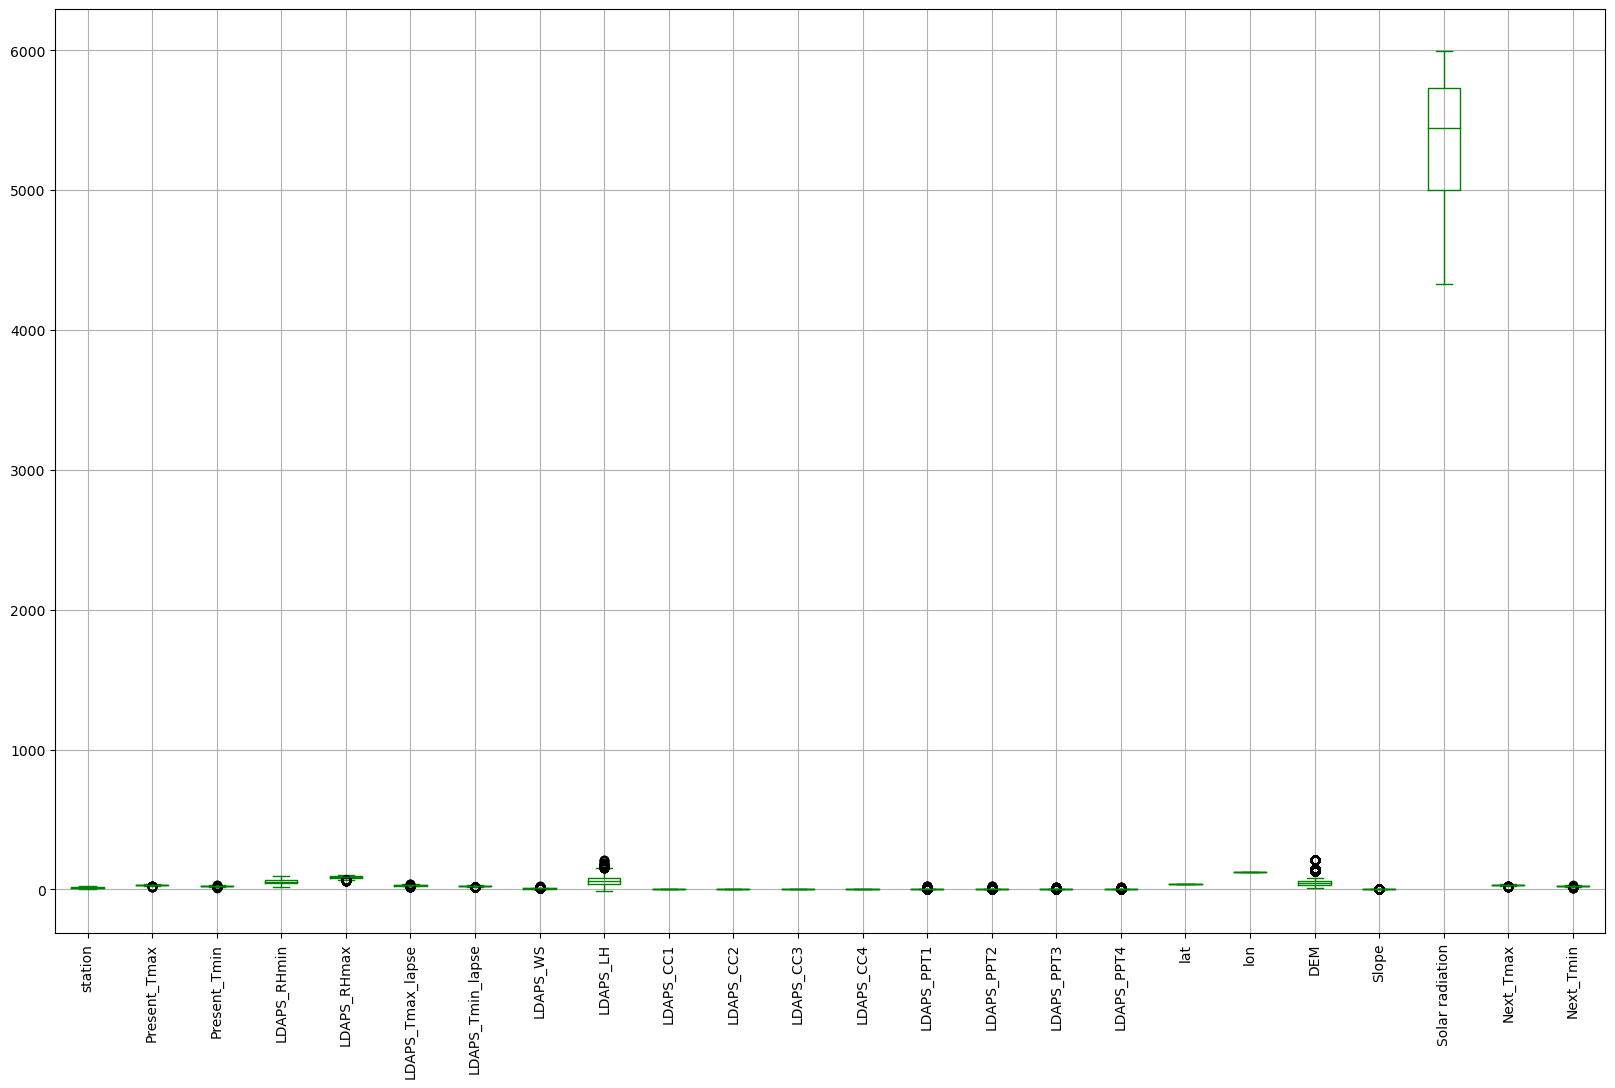

In [61]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis. Solar radiation has a different scale noticeably.

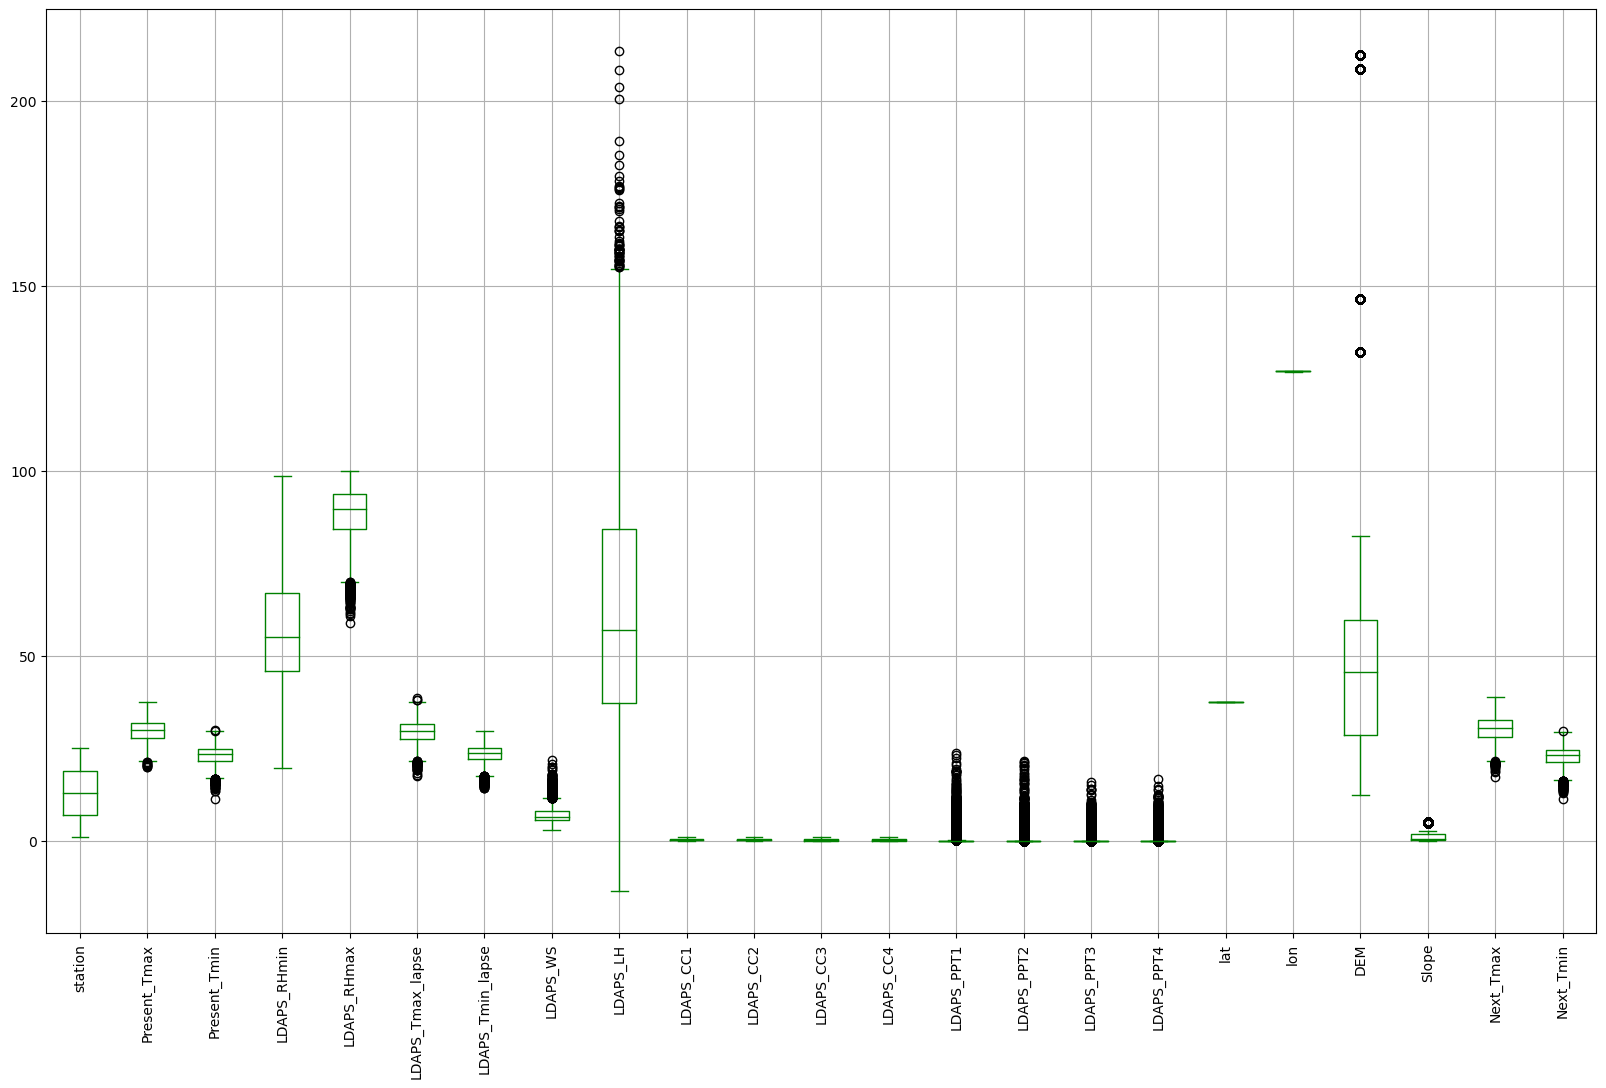

In [62]:
# Draw a boxplot for each independent variable 
df.drop('Solar radiation', axis=1).boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

Above we plot all features but 'Solar radiation' and we can conclude the other columns are in different scales too.

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 Comparing the Next Day's maximum and minimum temperature over time

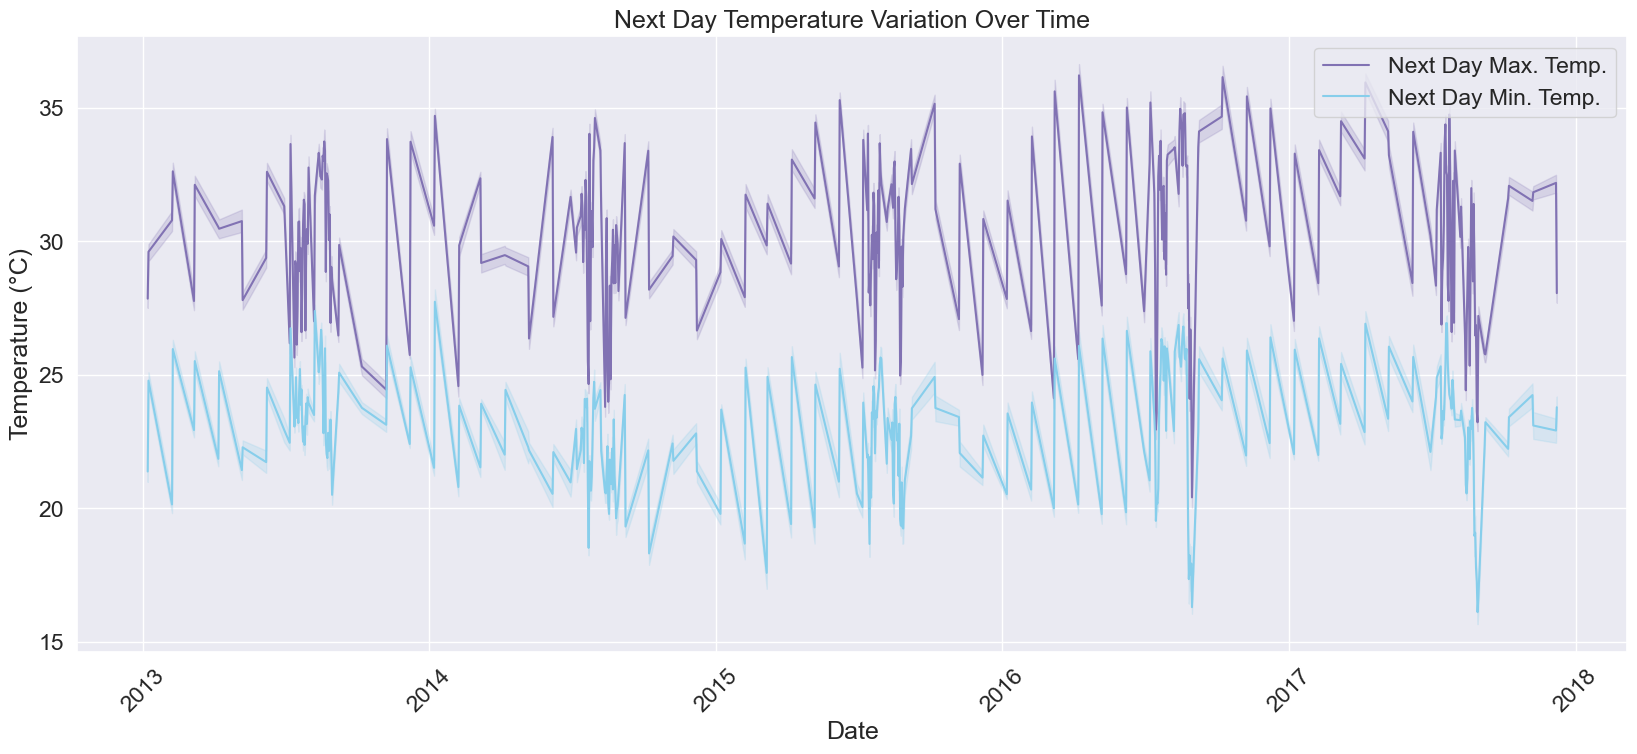

In [63]:
# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.5)  
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Next_Tmax', data=df, label='Next Day Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Next_Tmin', data=df, label='Next Day Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

The above plot shows how the maximum and minimum next-day temperature was registered over time. The maximum temperature registered was about 36 C in the last quarter of 2016, and the lowest where registered in the last quarter of 2018.

#### 1.4.2.2 Comparison of current maximum and minimum temperature over time

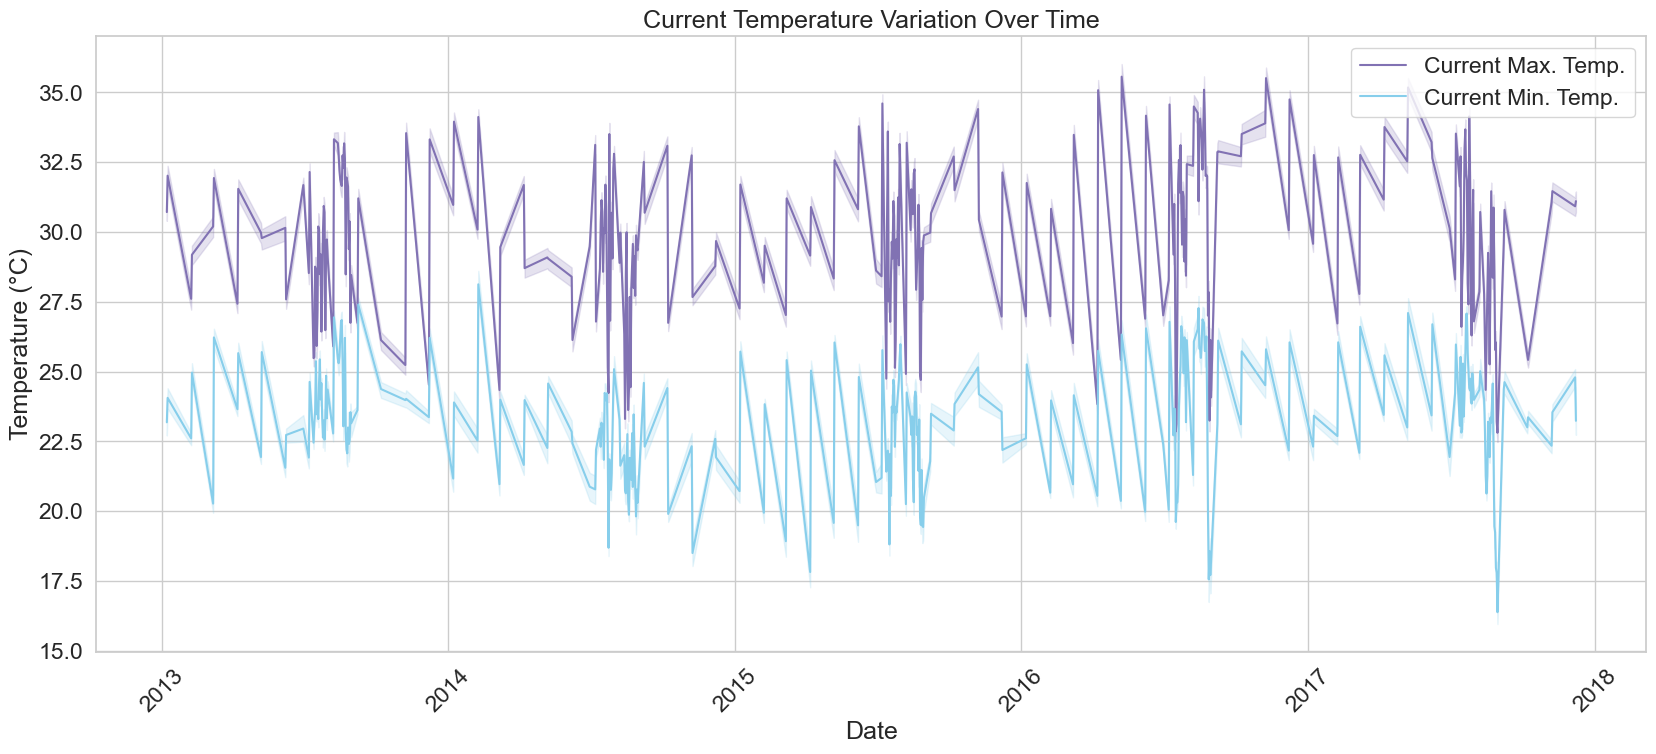

In [64]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Present_Tmax', data=df, label='Current Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Present_Tmin', data=df, label='Current Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Current Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

Above plot shows how the maximum and minimum current temperature was registered over the time.

#### 1.4.2.3 Comparison of Next Day's humidity level over time

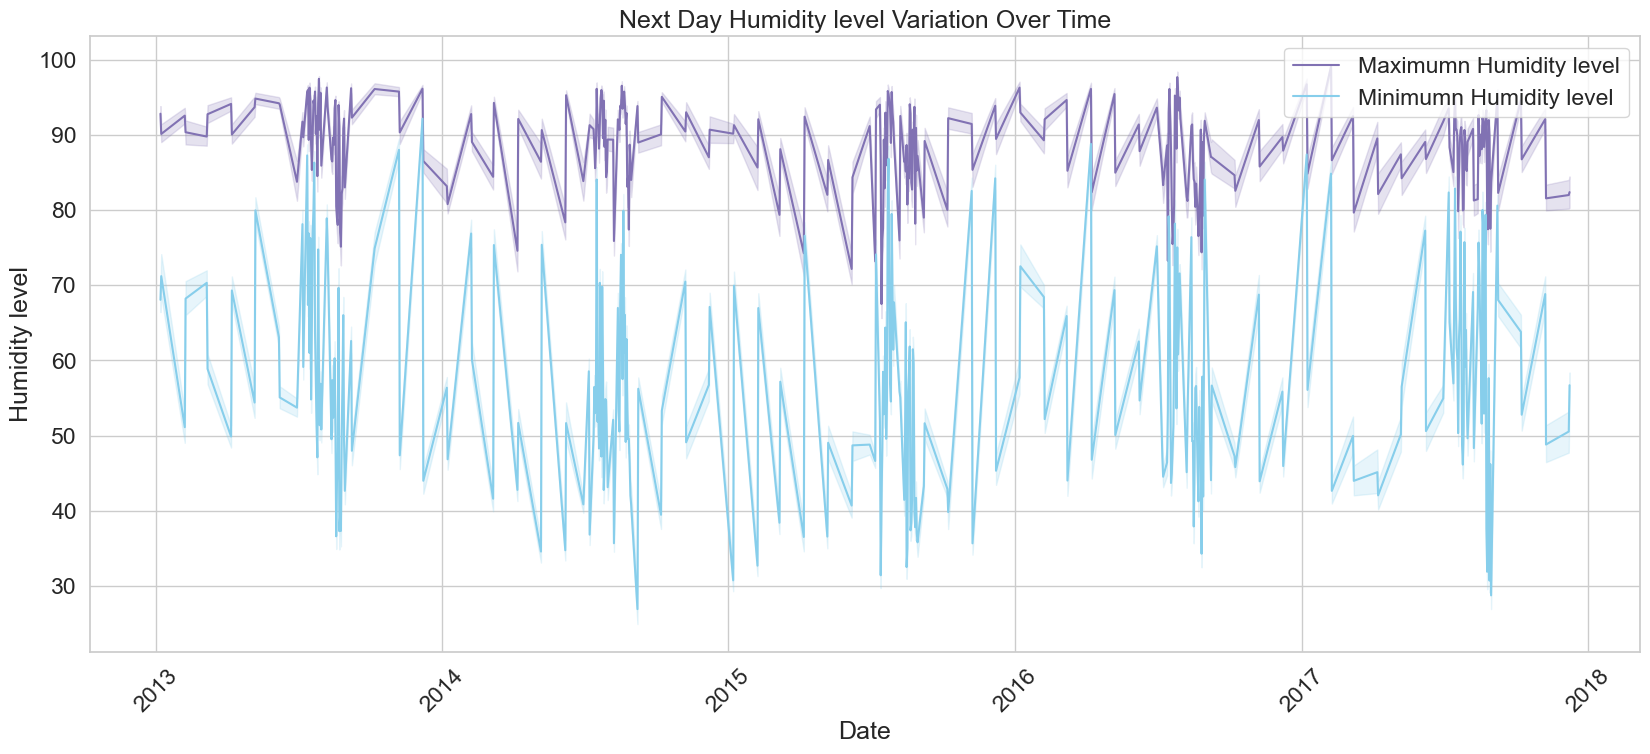

In [65]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmax', data=df, label='Maximumn Humidity level', color='m')

# line plot for the minimun humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmin', data=df, label='Minimumn Humidity level', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Humidity level Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity level')

plt.show()

Above plot shows how the maximum and minimum next-day humidity level was registered over the time.

#### 1.4.2.4 Comparison of Next Day's Temperatue applied lapse rate over time

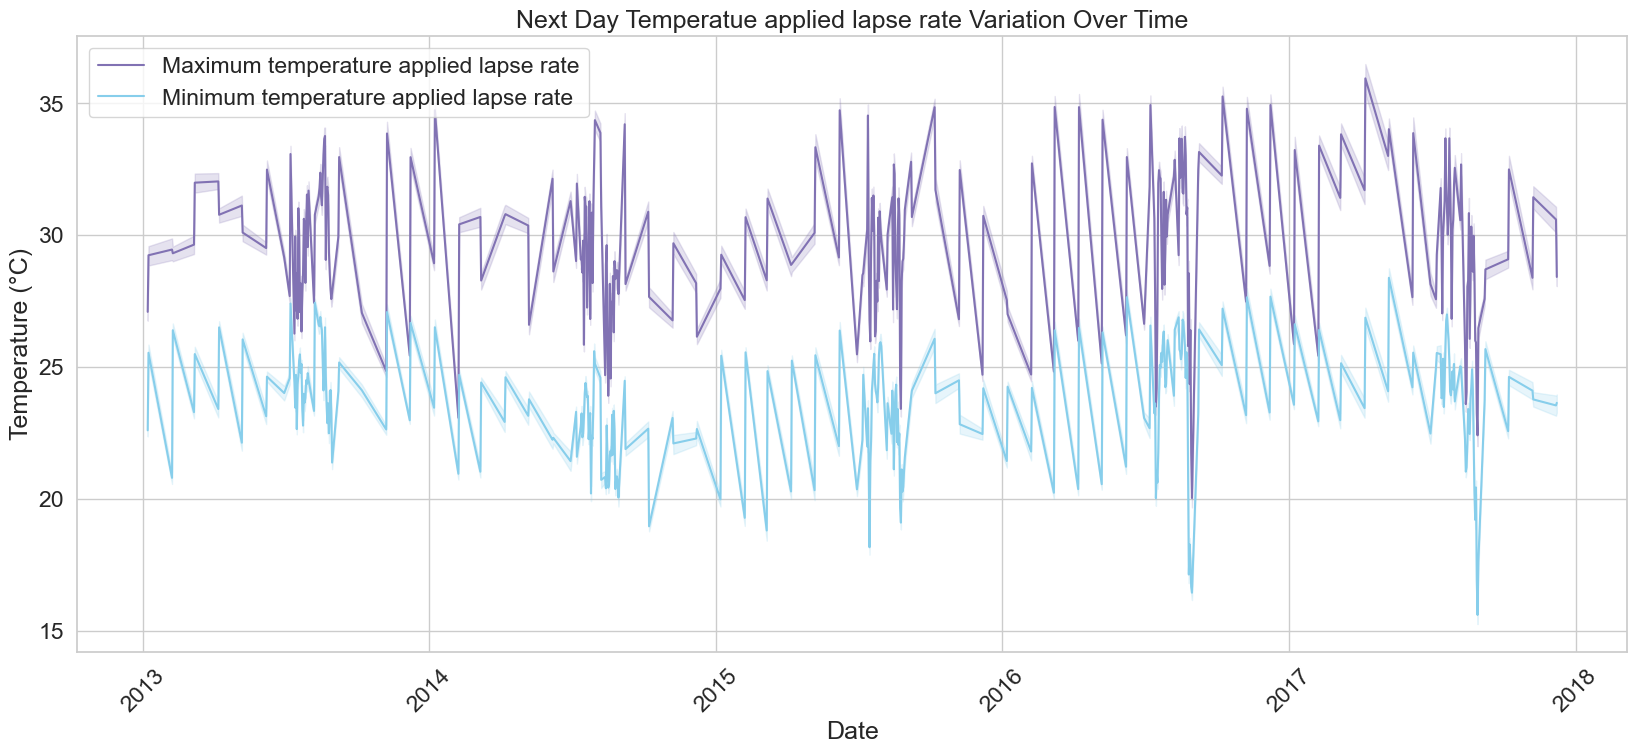

In [66]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='LDAPS_Tmax_lapse', data=df, label='Maximum temperature applied lapse rate', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='LDAPS_Tmin_lapse', data=df, label='Minimum temperature applied lapse rate', color='skyblue')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Next Day Temperatue applied lapse rate Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

Above plot shows how the maximum and minimum next-day temperature applied lapse rate was registered over the time.

#### 1.4.2.5 Comparison model forecast of next-day split average cloud cover over time

* LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
* LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
* LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
* LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

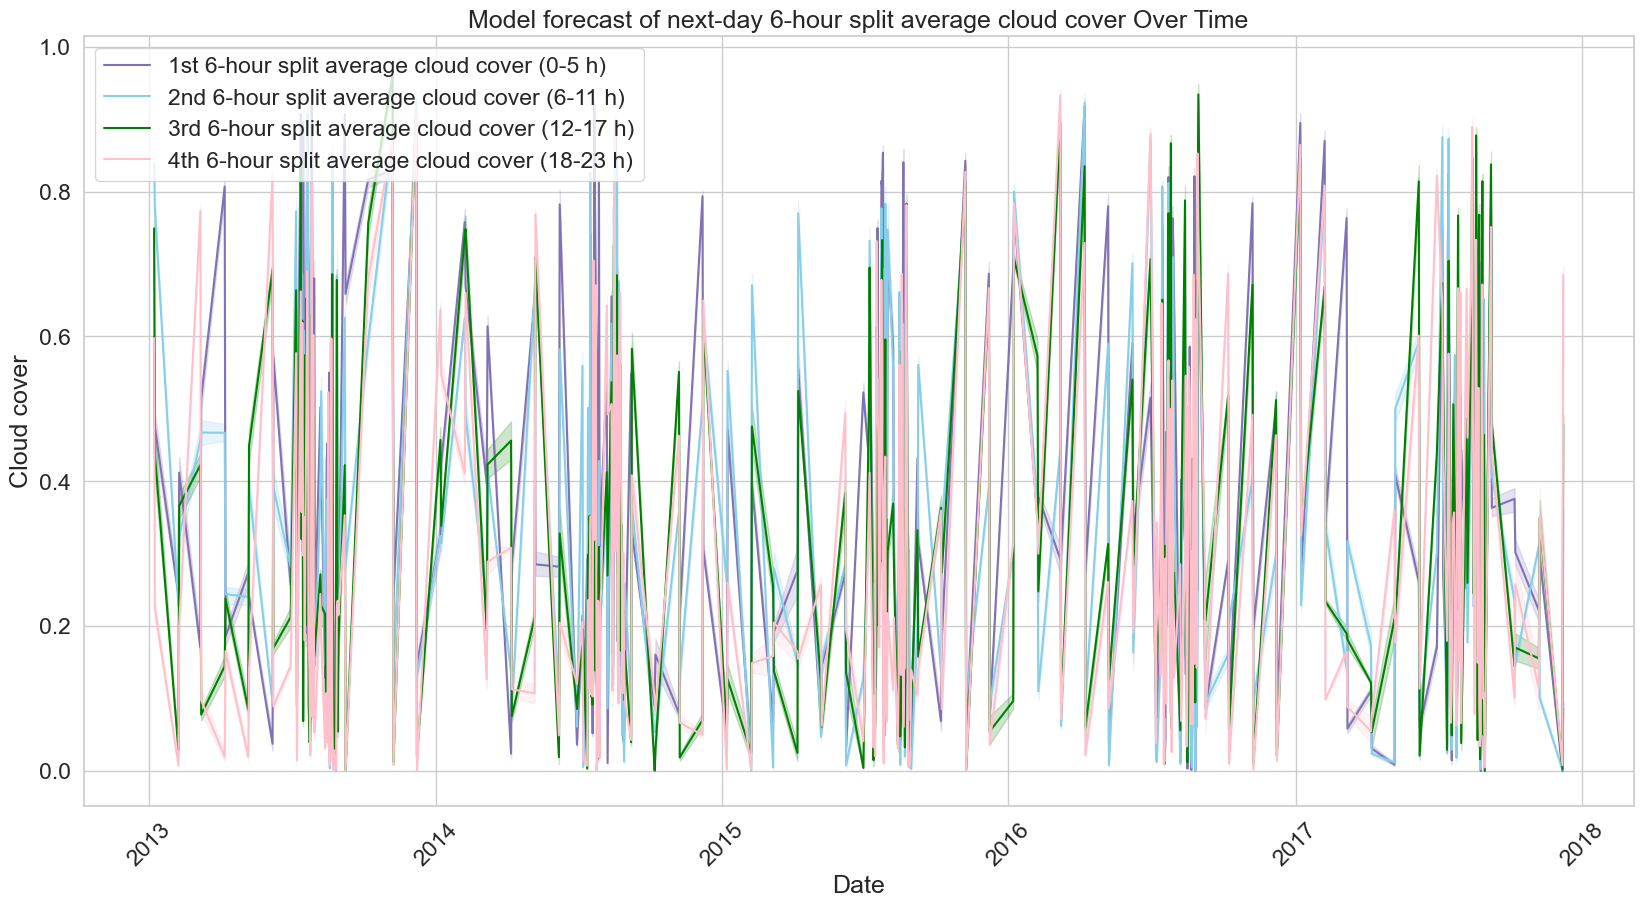

In [67]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_CC1', data=df, label='1st 6-hour split average cloud cover (0-5 h)', color='m')
sns.lineplot(x='Date', y='LDAPS_CC2', data=df, label='2nd 6-hour split average cloud cover (6-11 h)', color='skyblue')
sns.lineplot(x='Date', y='LDAPS_CC3', data=df, label='3rd 6-hour split average cloud cover (12-17 h)', color='green')
sns.lineplot(x='Date', y='LDAPS_CC4', data=df, label='4th 6-hour split average cloud cover (18-23 h)', color='pink')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average cloud cover Over Time')
plt.xlabel('Date')
plt.ylabel('Cloud cover')

plt.show()

Above plot shows how the Average cloud cover was registered over the time.

#### 1.4.2.6 Comparison model forecast of next-day split average precipitation over time

* LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
* LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
* LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
* LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

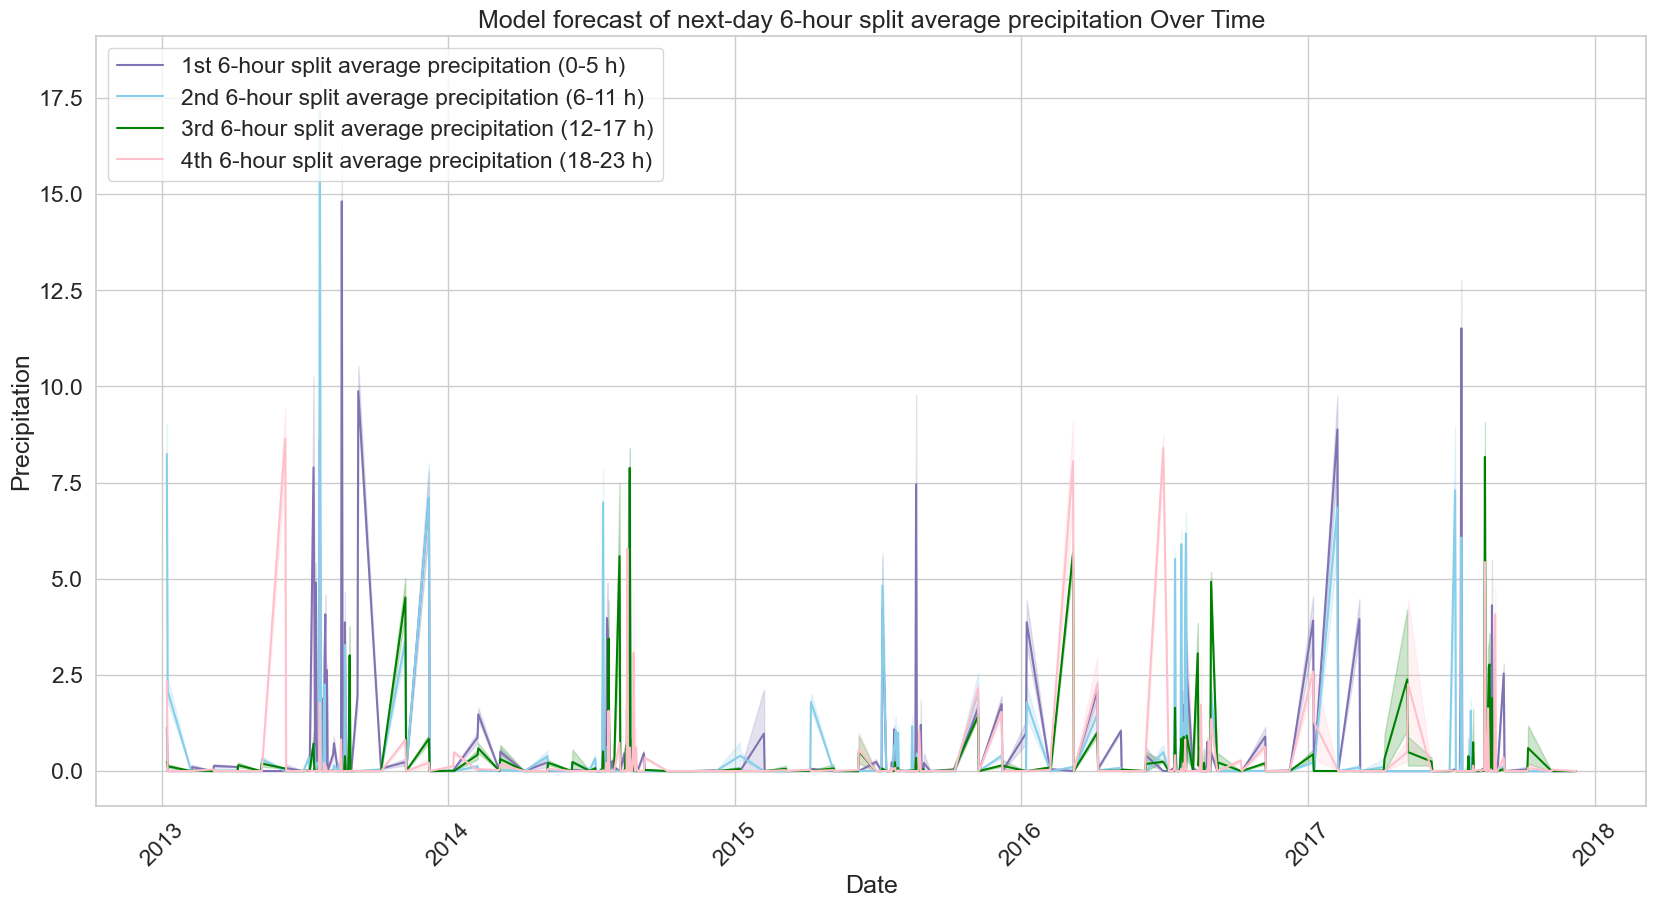

In [68]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_PPT1', data=df, label='1st 6-hour split average precipitation (0-5 h)', color='m')
sns.lineplot(x='Date', y='LDAPS_PPT2', data=df, label='2nd 6-hour split average precipitation (6-11 h)', color='skyblue')
sns.lineplot(x='Date', y='LDAPS_PPT3', data=df, label='3rd 6-hour split average precipitation (12-17 h)', color='green')
sns.lineplot(x='Date', y='LDAPS_PPT4', data=df, label='4th 6-hour split average precipitation (18-23 h)', color='pink')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()

Above plot shows how the Average precipitation was registered over the time.

#### 1.4.2.7 Model forecast of next-day average wind speed over time

* LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 

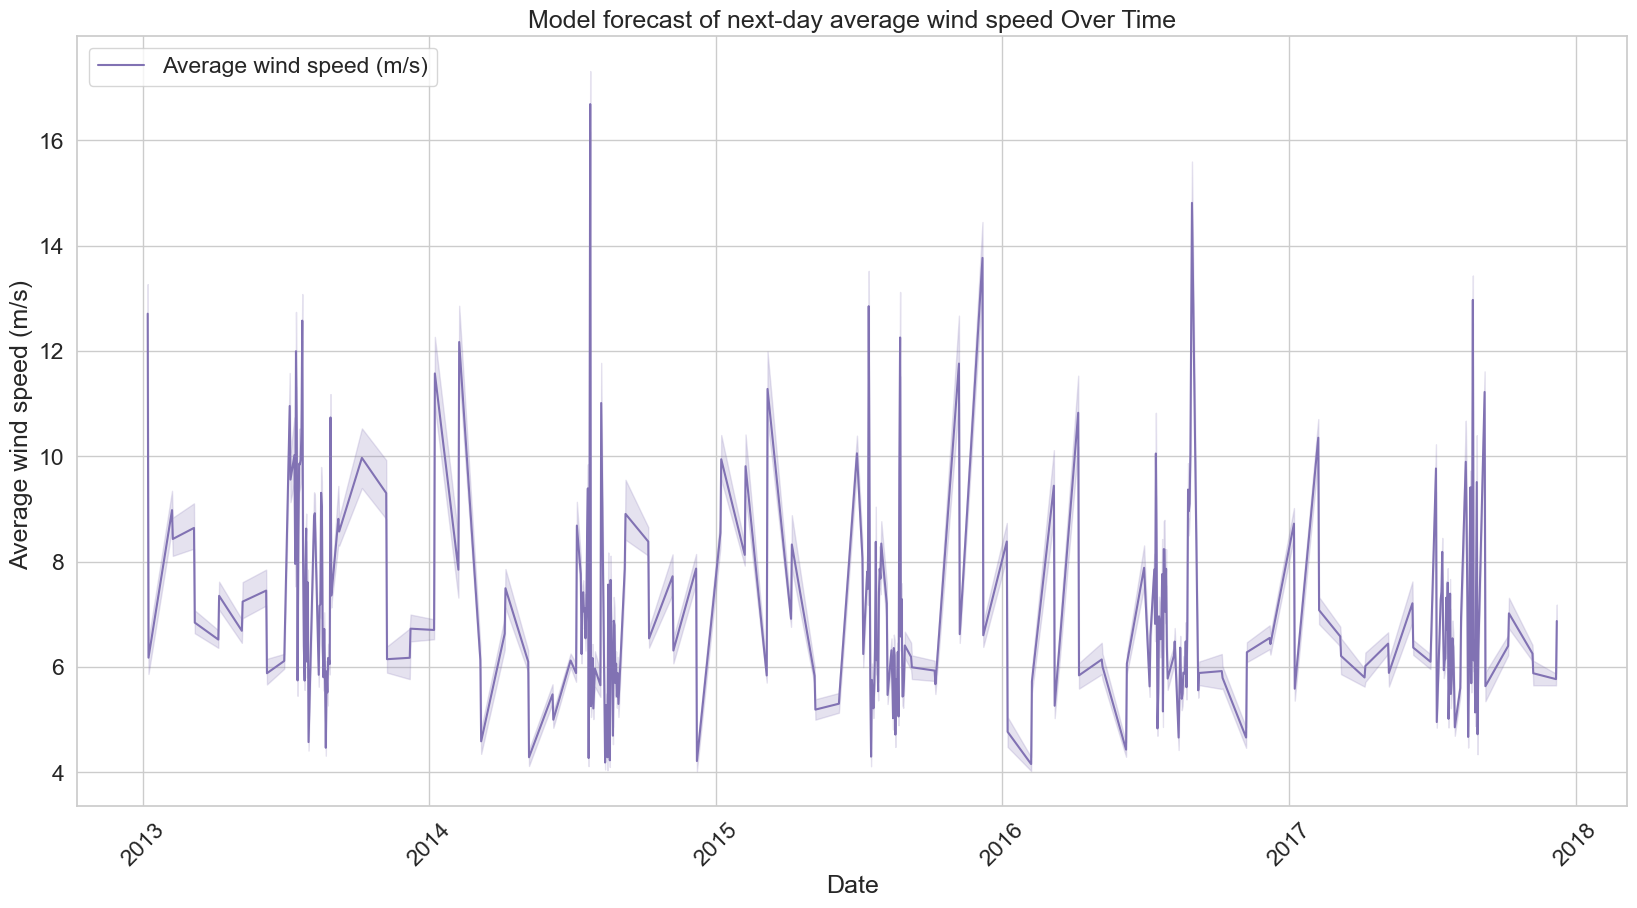

In [69]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_WS', data=df, label='Average wind speed (m/s)', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average wind speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average wind speed (m/s) ')

plt.show()

Above plot shows how the next-day average wind speed was registered over the time.

#### 1.4.2.8 Model forecast of next-day average latent heat flux (W/m2) over time

* LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

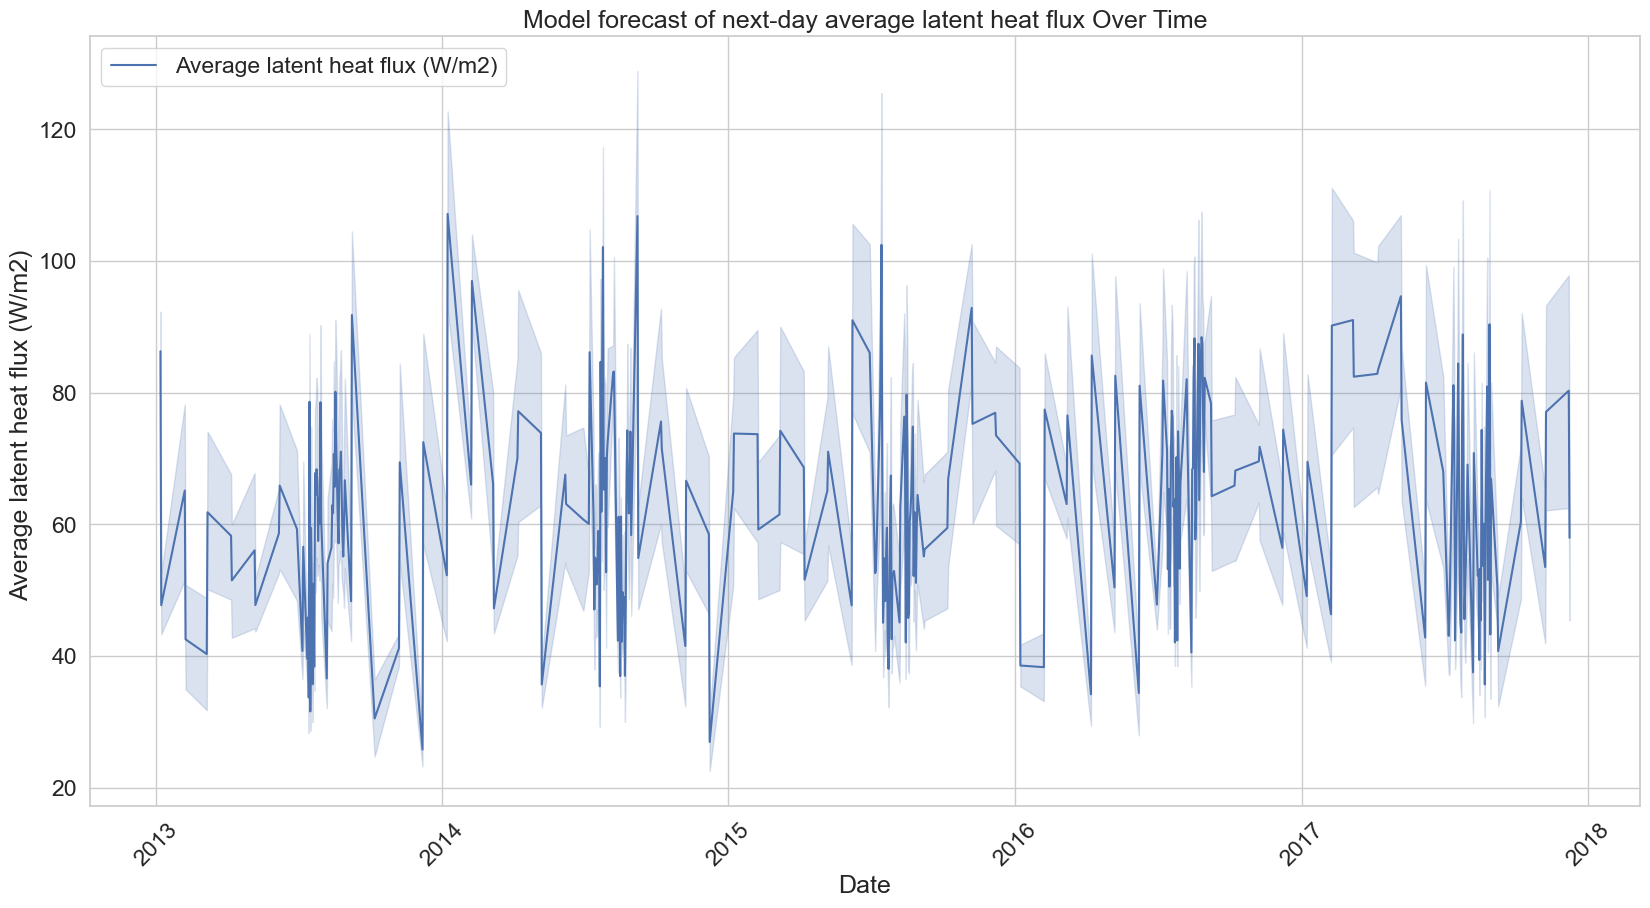

In [70]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_LH', data=df, label='Average latent heat flux (W/m2)', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average latent heat flux Over Time')
plt.xlabel('Date')
plt.ylabel('Average latent heat flux (W/m2) ')

plt.show()

Above plot shows how the next-day average latent heat flux was registered over the time.

#### 1.4.2.9 Elevation over time

* DEM - Elevation (m): 12.4 to 212.3

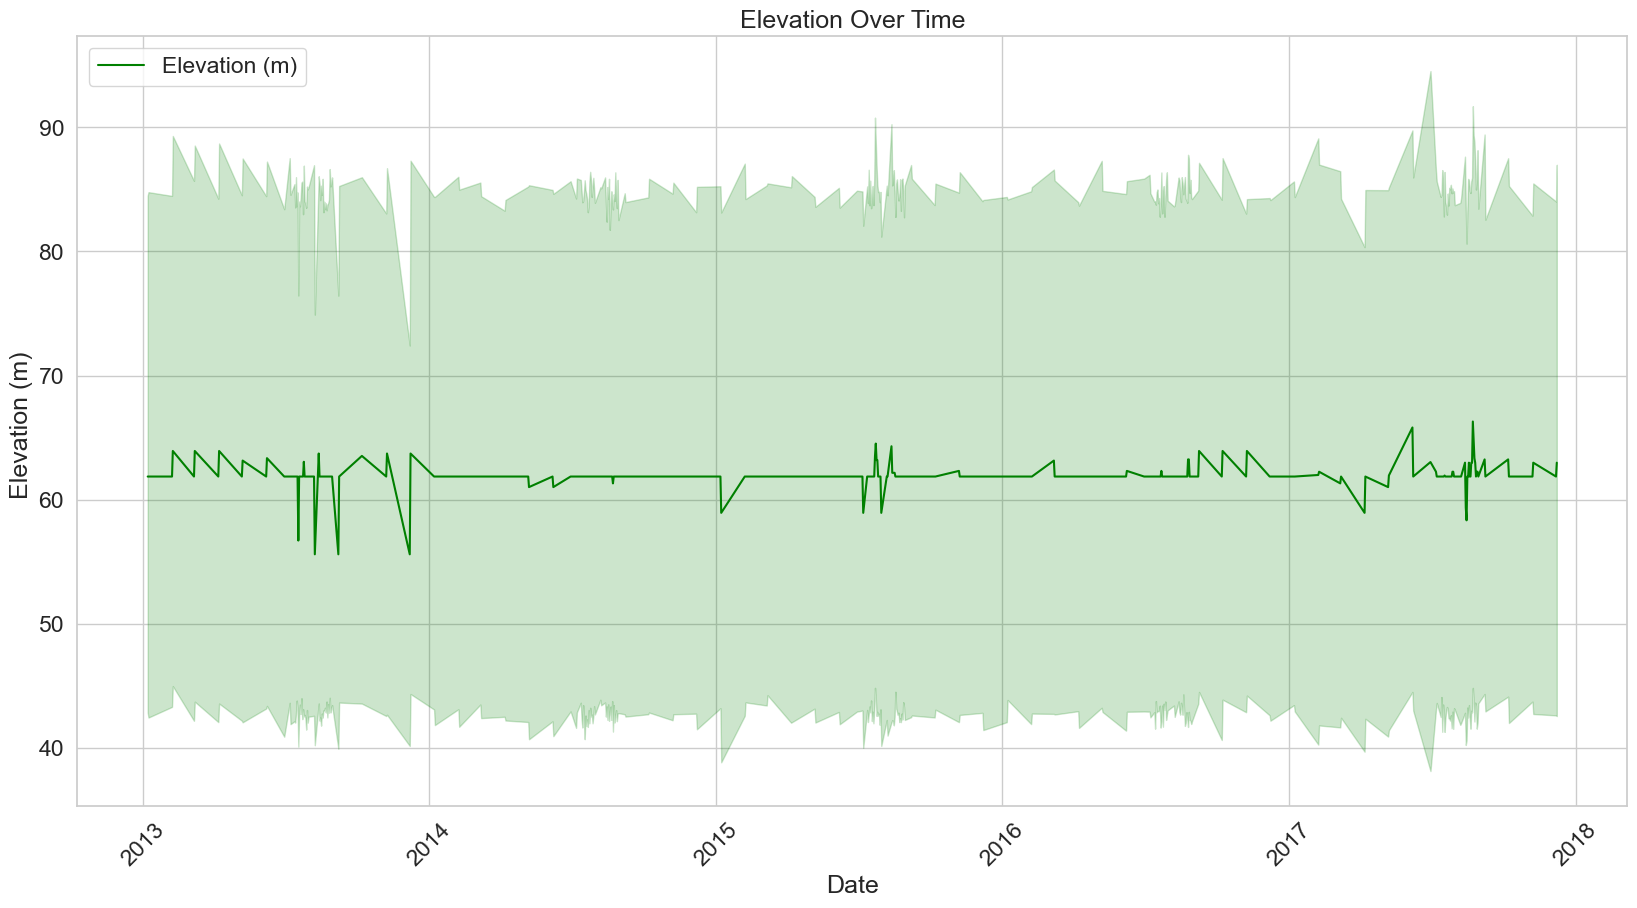

In [71]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='DEM', data=df, label='Elevation (m)', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Elevation Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (m) ')

plt.show()

Above plot shows how the elevation was registered over the time.

#### 1.4.2.10 Slope  over time

* Slope - Slope (Â°): 0.1 to 5.2

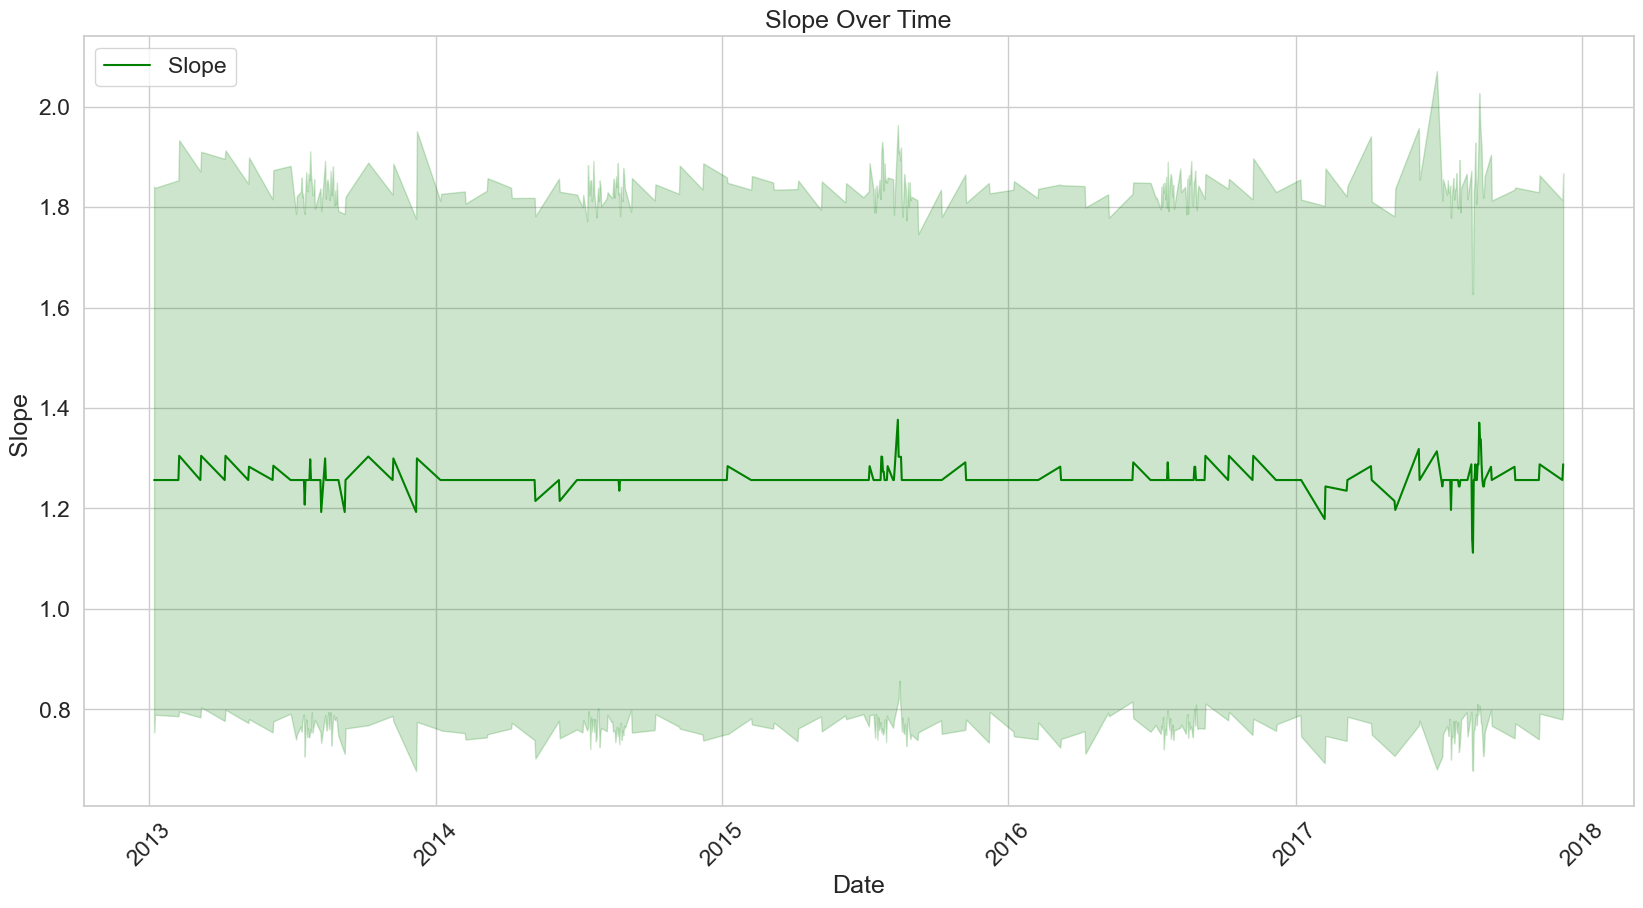

In [72]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Slope', data=df, label='Slope', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Slope Over Time')
plt.xlabel('Date')
plt.ylabel('Slope ')

plt.show()

Above plot shows how the Slope was registered over the time.

#### 1.4.2.11 Daily incoming Solar radiation over time

* Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

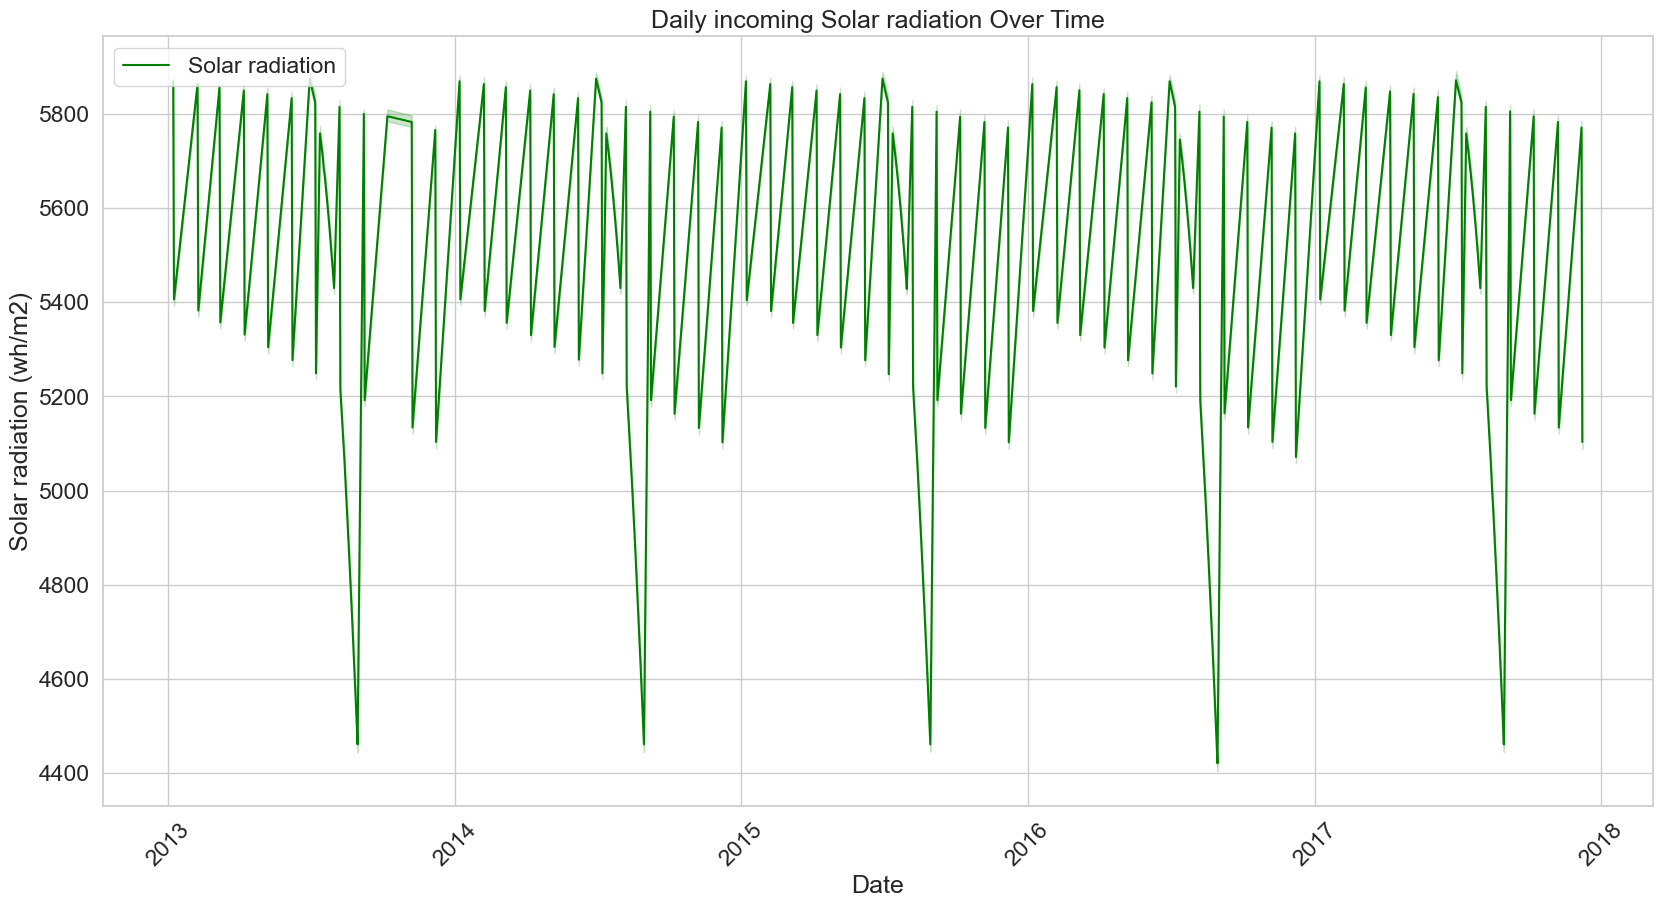

In [73]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Solar radiation', data=df, label='Solar radiation', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily incoming Solar radiation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar radiation (wh/m2)')

plt.show()

Above plot shows how the Solar radiation was registered over the time.

#### 1.4.2.12  Plants location categorized by Primary Fuel

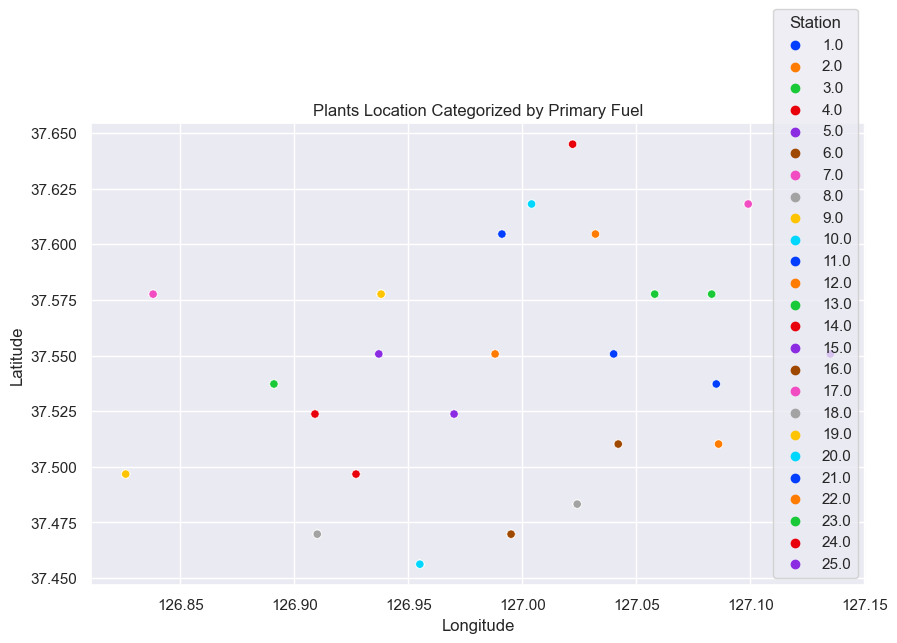

In [74]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)  

# Map simulation with scatterplot
sns.scatterplot(x='lon', y='lat', hue='station', data=df, palette='bright')

# visual presentation
plt.legend(loc='lower right').set_title("Station")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location Categorized by Primary Fuel')
plt.show()


Above we simulate a map with the position of each position where the observation were taken by station.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Pairplot

In [ ]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

#### 1.4.3.2  Encoding categorical columns
In order to make the multivariate Analysis we need to encode the categorical features, for this purpose, we will use OrdinalEncoder.

<!-- df_backup5 = df.copy() -->

In [77]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

category_mappings = {}

col = 'position'
# Fit and transform the column
df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
# Store the category mappings 
category_mappings[col] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT3  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  position  
0       21.2      20.0  
1       22.5      21.0  
2       23.9      18.0  
3       24.3      24.0  
4       22.5      15.0  

[5 rows x 26 columns]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7745     21.0 2017-08-30          23.1          17.8    24.688997   
7746     22.0 2017-08-30          22.5          17.4    30.094858   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  \
7745    78.261383         27.812697         18.303014  6.603253   9.614074   
7746    83.690018         26.704905         17.814038  5.768083  82.146707   
7747    78.869858         26.352081         18.775678  6.148918  72.058294   
7748    77.294975         27.010193         18.733519  6.542819  47.241457   
7749    77.243744         27.939516         18.522965  7.289264   9.090034   

      ...  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
7745  ...         0.0         0.0  37.5507  127.040  26.2980  0.5721   
7746  ...         0.0         0.0  37.5102  127.086  21.9668  0.1332   
7747  ...         0.0         0.0  37.5372  126.891  15.5876  0.1554   
7748  ...         0.0         0.0  37.5237  126.909  17.2956  0.2223   
7749  ...         0.0         0.0  37.5237  126.970  19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  position  
7745      4456.024414       27.6       17.7      14.0  
7746      4441.803711       28.0       17.1       7.0  
7747      4443.313965       28.3       18.1      10.0  
7748      4438.373535       28.6       18.8       8.0  
7749      4451.345215       27.8       17.4       9.0  

[5 rows x 26 columns]

We have converted the categorical columns into numerical columns using Ordinal Encoder method. We save the categories for use later.

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga